In [1]:
from field_of_view import FieldOfView
from clusters import Cluster
from cluster_algorithms import ClusteringAlgorithm, kmeans_function_generator, hdbscan_function_generator, nth_neighbor_hdbscan_function_generator
from plot_helpers import moving_average, plot_scale_bar

import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import KDTree
from scipy.cluster.vq import kmeans, vq

import os

In [2]:
nm_per_pixel = 21.34
time_per_frame = 0.1

# cluster_algorithms = [ClusteringAlgorithm(kmeans_function_generator(30, 70/nm_per_pixel, 30), 'GluA2'),
#                       ClusteringAlgorithm(hdbscan_function_generator(10, 10, 0), 'GluA2'),
#                       ClusteringAlgorithm(hdbscan_function_generator(20, 10, 0), 'GluA2')]


In [3]:
Tau_D_7xR3 = 150.32
Tau_D_16xR1 = 97

path_list_GLUA1_7xR3 = ["0317_B2_", "0317_B3_", "0317_C1_", "0522_B1_", "0522_B2_", "1123_B1_", "1123_B2_"]
path_list_GLUA2_7xR3 = ["0317_A1_", "0317_D1_", "0317_D2_", "0522_A1_", "1027_A1_", "1218_A1_"]
path_list_GLUA1_16xR1 = ["0317_A1_", "0317_D1_", "0317_D2_", "0522_A1_", "1027_A1_", "1218_A1_"]
path_list_GLUA2_16xR1 = ["0317_B2_", "0317_B3_", "0317_C1_", "0522_B1_", "0522_B2_", "1123_B1_", "1123_B2_"]
path_lists = [path_list_GLUA1_7xR3, path_list_GLUA2_7xR3, path_list_GLUA1_16xR1, path_list_GLUA2_16xR1]
point_wrappers = [["Data/7xR3/", "GluA1", "_corrected.csv", Tau_D_7xR3], ["Data/7xR3/", "GluA2", "_corrected.csv", Tau_D_7xR3], 
                  ["Data/16xR1/", "GluA1", "_corrected.csv", Tau_D_16xR1], ["Data/16xR1/", "GluA2", "_corrected.csv", Tau_D_16xR1]]
FOVs = [[],[],[],[]]

def generate_cluster_algorithms(label):
    return [ClusteringAlgorithm(nth_neighbor_hdbscan_function_generator(40, 70/nm_per_pixel), label),
            ClusteringAlgorithm(nth_neighbor_hdbscan_function_generator(50, 70/nm_per_pixel), label)]

cluster_algorithms = {'GluA1': generate_cluster_algorithms('GluA1'),
                      'GluA2': generate_cluster_algorithms('GluA2')}

for i in range(len(FOVs)):
    path_list = path_lists[i]
    FOV_list = FOVs[i]
    for path in path_list:
        homer_path = "Data/Homer/" + path + "aHomer_corrected.csv"
        life_act_path = "Data/LifeAct/" + path + "Composite.tif"
        starplane_path = "Data/Spines/" + path + "spines_starplane.npy"
        labels_roi_path = "Data/Spines/" + path + "spines_labels_roi.json"
        point_path = point_wrappers[i][0] + path + point_wrappers[i][1] + point_wrappers[i][2]
        points_data = [[point_wrappers[i][1], point_path, 'white', time_per_frame, point_wrappers[i][3]]]
        cluster_algs = cluster_algorithms[point_wrappers[i][1]]
        FOV = FieldOfView(homer_centers=homer_path, 
                  life_act=life_act_path,
                  starplane_file=starplane_path,
                  labels_roi_file=labels_roi_path,
                  nm_per_pixel=nm_per_pixel,
                  points=points_data, 
                  cluster_algorithms=cluster_algs, 
                  to_print=True,
                  filter_spines=True)
        FOV_list.append(FOV)

Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 110/110 [00:00<00:00, 278.88spine/s]


Clustering completed.
Filtered 55 Spines, Finding 2 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 48/48 [00:00<00:00, 381.22spine/s]

Clustering completed.
Filtered 24 Spines, Finding 0 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...


Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 100/100 [00:00<00:00, 491.54spine/s]


Clustering completed.
Filtered 50 Spines, Finding 0 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 114/114 [00:00<00:00, 196.39spine/s]


Clustering completed.
Filtered 57 Spines, Finding 8 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 90/90 [00:00<00:00, 166.48spine/s]


Clustering completed.
Filtered 45 Spines, Finding 6 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 134/134 [00:00<00:00, 335.36spine/s]


Clustering completed.
Filtered 67 Spines, Finding 0 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 150/150 [00:00<00:00, 197.00spine/s]


Clustering completed.
Filtered 75 Spines, Finding 10 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 92/92 [00:00<00:00, 126.80spine/s]


Clustering completed.
Filtered 46 Spines, Finding 7 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 118/118 [00:00<00:00, 187.82spine/s]


Clustering completed.
Filtered 59 Spines, Finding 12 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 94/94 [00:00<00:00, 195.25spine/s]


Clustering completed.
Filtered 47 Spines, Finding 2 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 144/144 [00:00<00:00, 146.28spine/s]


Clustering completed.
Filtered 72 Spines, Finding 25 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 148/148 [00:00<00:00, 510.75spine/s]


Clustering completed.
Filtered 74 Spines, Finding 1 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 116/116 [00:00<00:00, 224.58spine/s]


Clustering completed.
Filtered 58 Spines, Finding 11 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 92/92 [00:00<00:00, 242.25spine/s]


Clustering completed.
Filtered 46 Spines, Finding 2 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 118/118 [00:00<00:00, 253.86spine/s]


Clustering completed.
Filtered 59 Spines, Finding 3 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 94/94 [00:00<00:00, 418.25spine/s]


Clustering completed.
Filtered 47 Spines, Finding 0 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 144/144 [00:00<00:00, 351.68spine/s]


Clustering completed.
Filtered 72 Spines, Finding 7 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 148/148 [00:00<00:00, 227.22spine/s]


Clustering completed.
Filtered 74 Spines, Finding 16 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA1...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 116/116 [00:00<00:00, 153.54spine/s]


Clustering completed.
Filtered 58 Spines, Finding 14 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 110/110 [00:00<00:00, 123.15spine/s]


Clustering completed.
Filtered 55 Spines, Finding 7 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 48/48 [00:01<00:00, 31.95spine/s]


Clustering completed.
Filtered 24 Spines, Finding 0 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 100/100 [00:00<00:00, 128.07spine/s]


Clustering completed.
Filtered 50 Spines, Finding 0 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 114/114 [00:00<00:00, 165.88spine/s]


Clustering completed.
Filtered 57 Spines, Finding 18 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 90/90 [00:00<00:00, 218.33spine/s]


Clustering completed.
Filtered 45 Spines, Finding 6 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 134/134 [00:04<00:00, 31.26spine/s]


Clustering completed.
Filtered 67 Spines, Finding 16 Good Spines
Loading Life Act...
Loading Starplane and Labels ROI...
Creating Spines from Starplane...
Loading Homer Centers...
Loading GluA2...
Assigning Points to Spines...
Starting clustering...


Clustering progress: 100%|██████████| 150/150 [00:04<00:00, 32.07spine/s]

Clustering completed.
Filtered 75 Spines, Finding 43 Good Spines


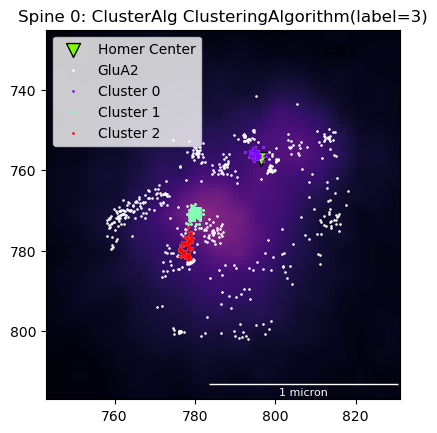

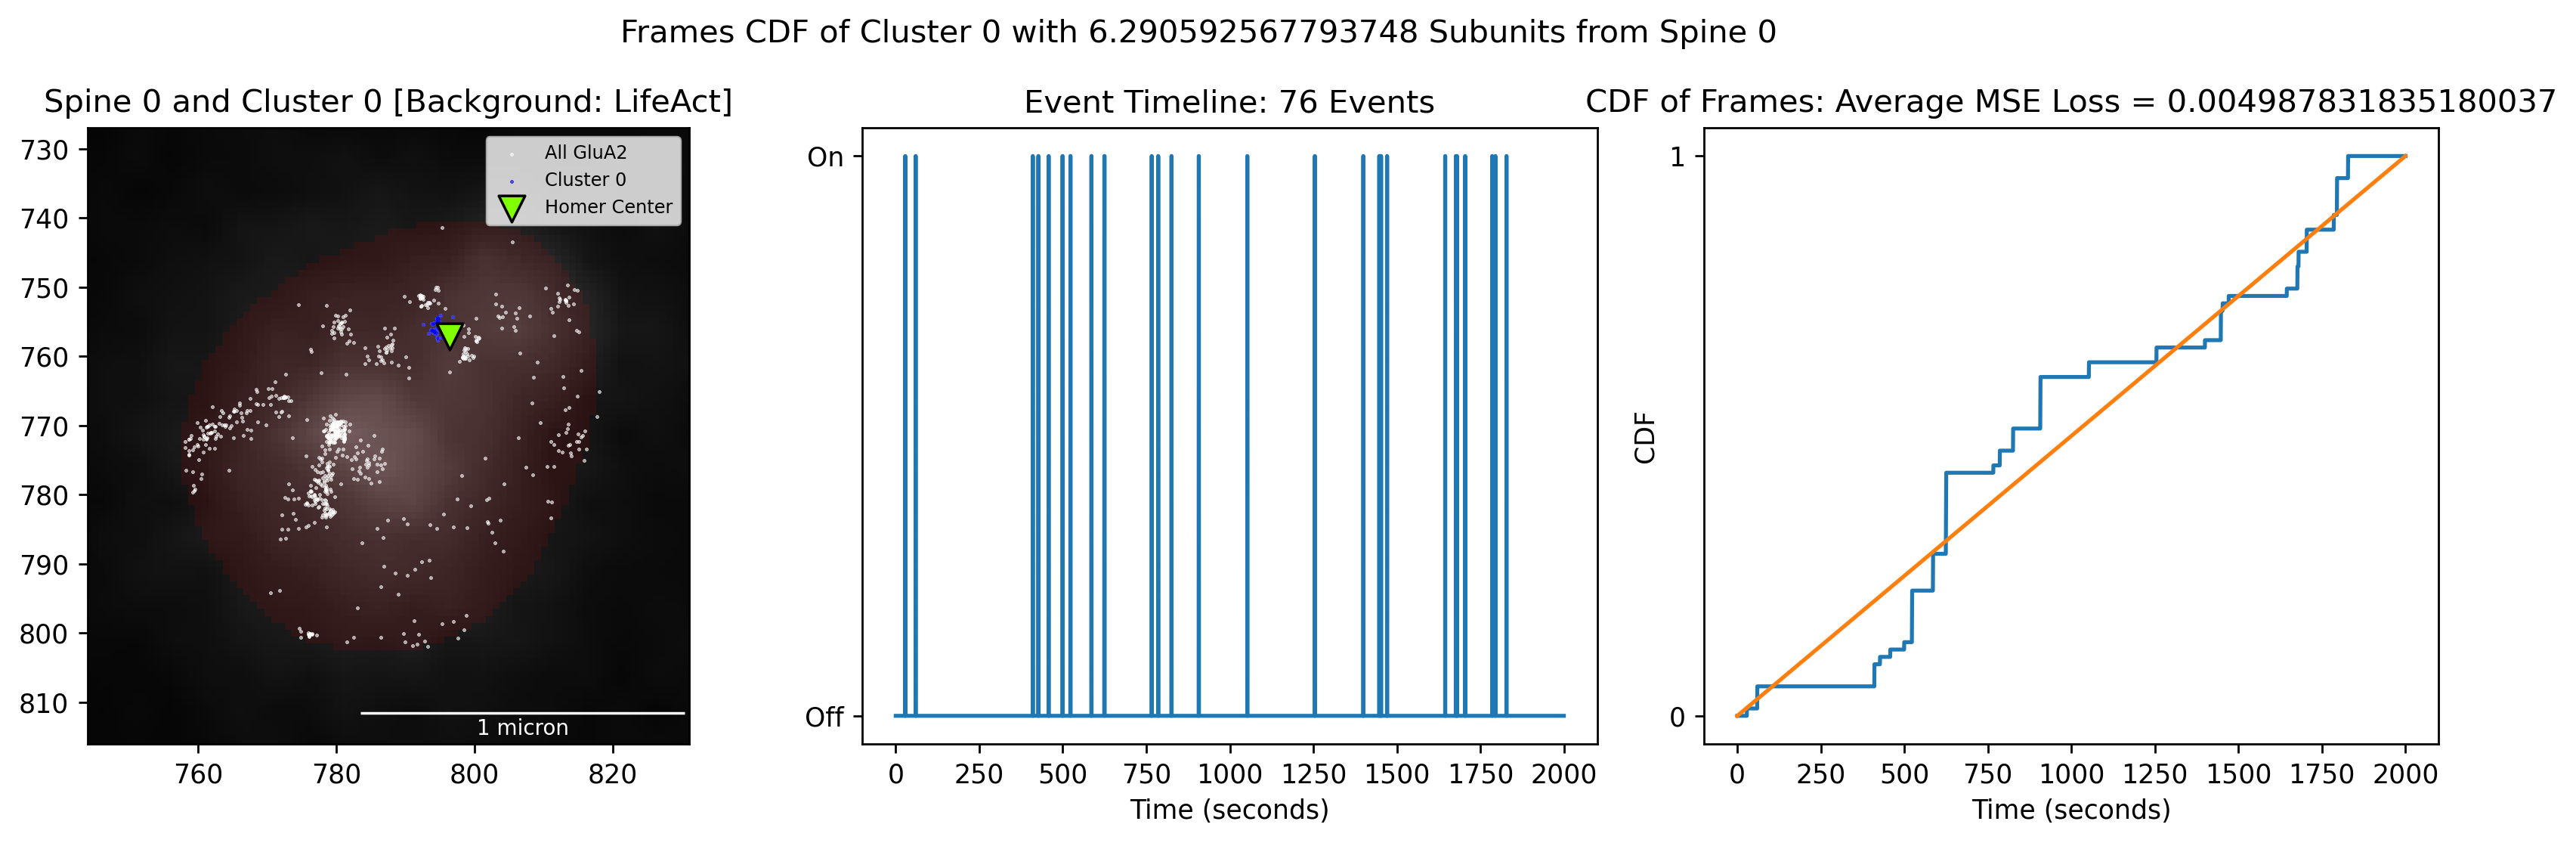

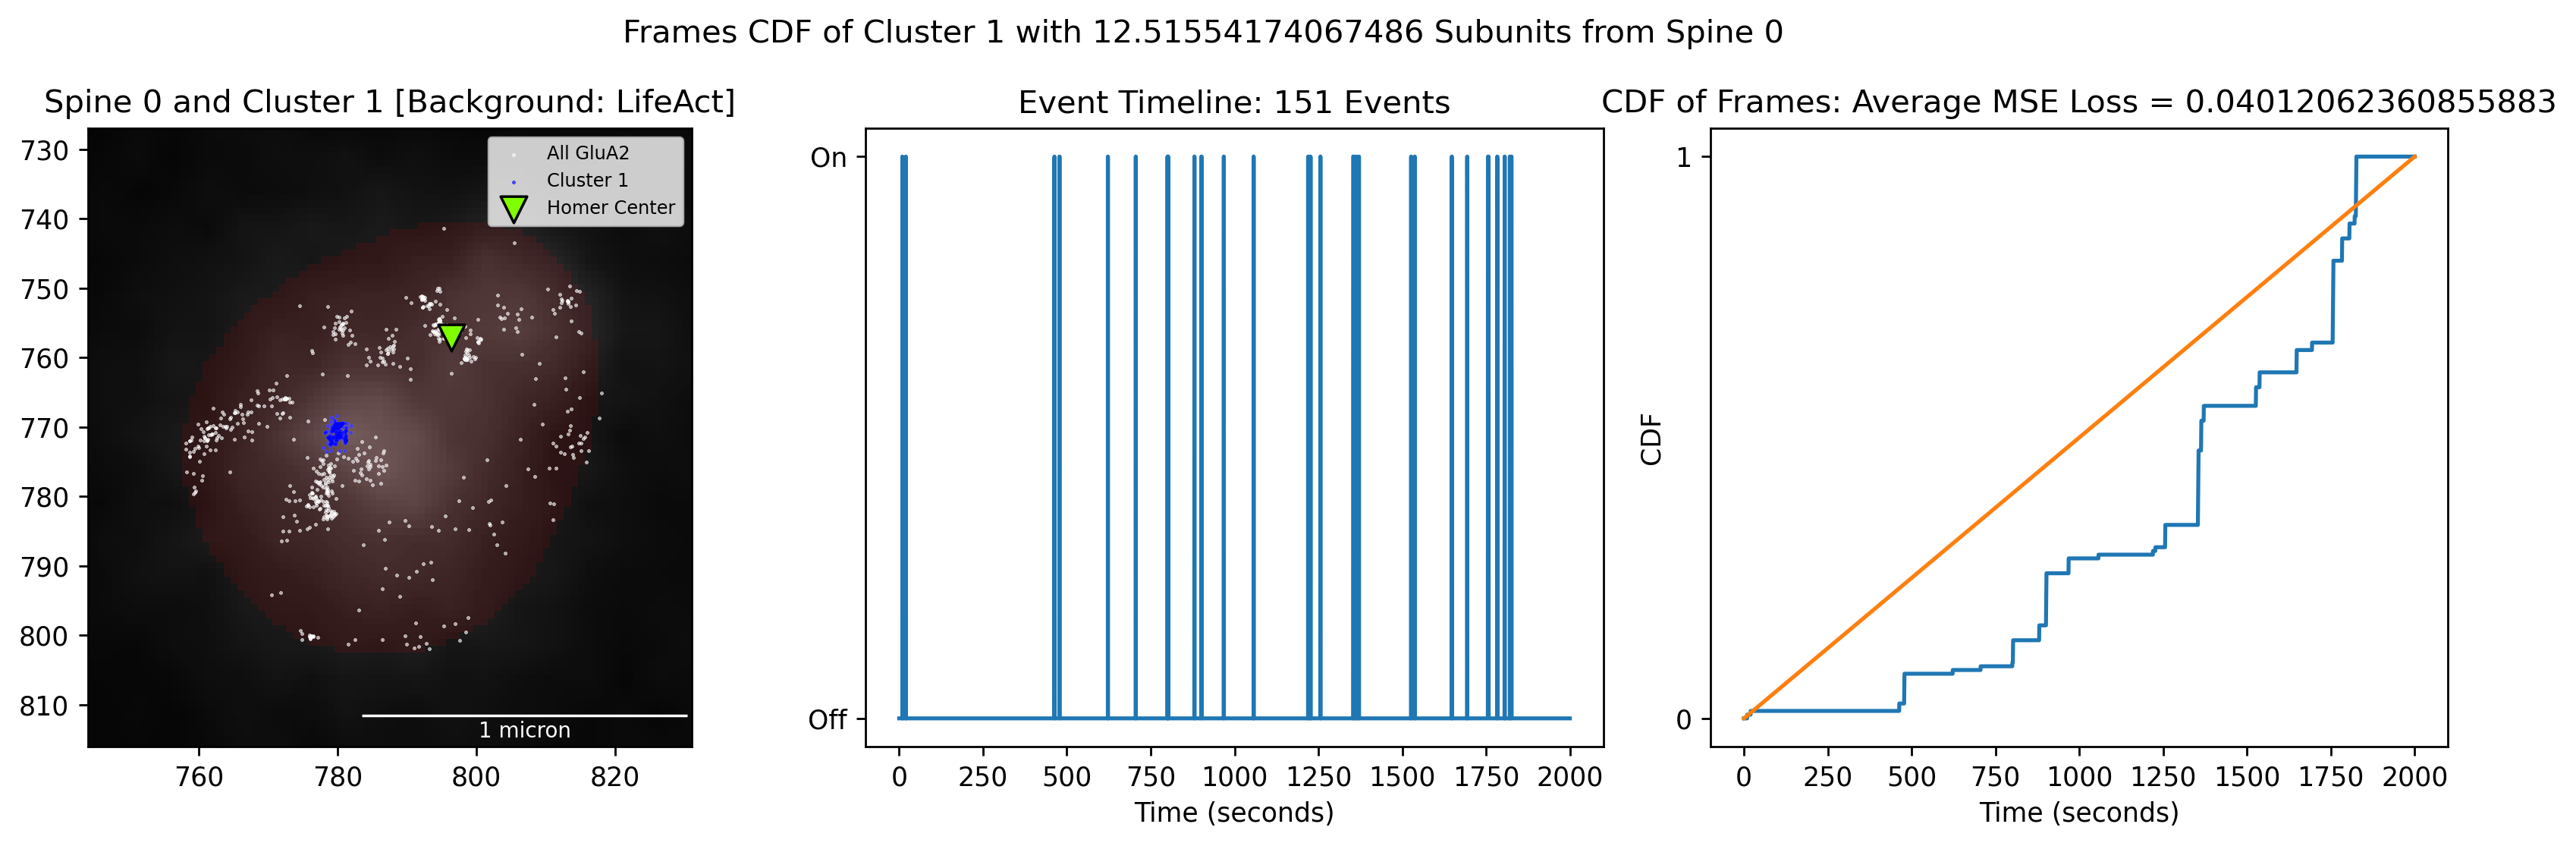

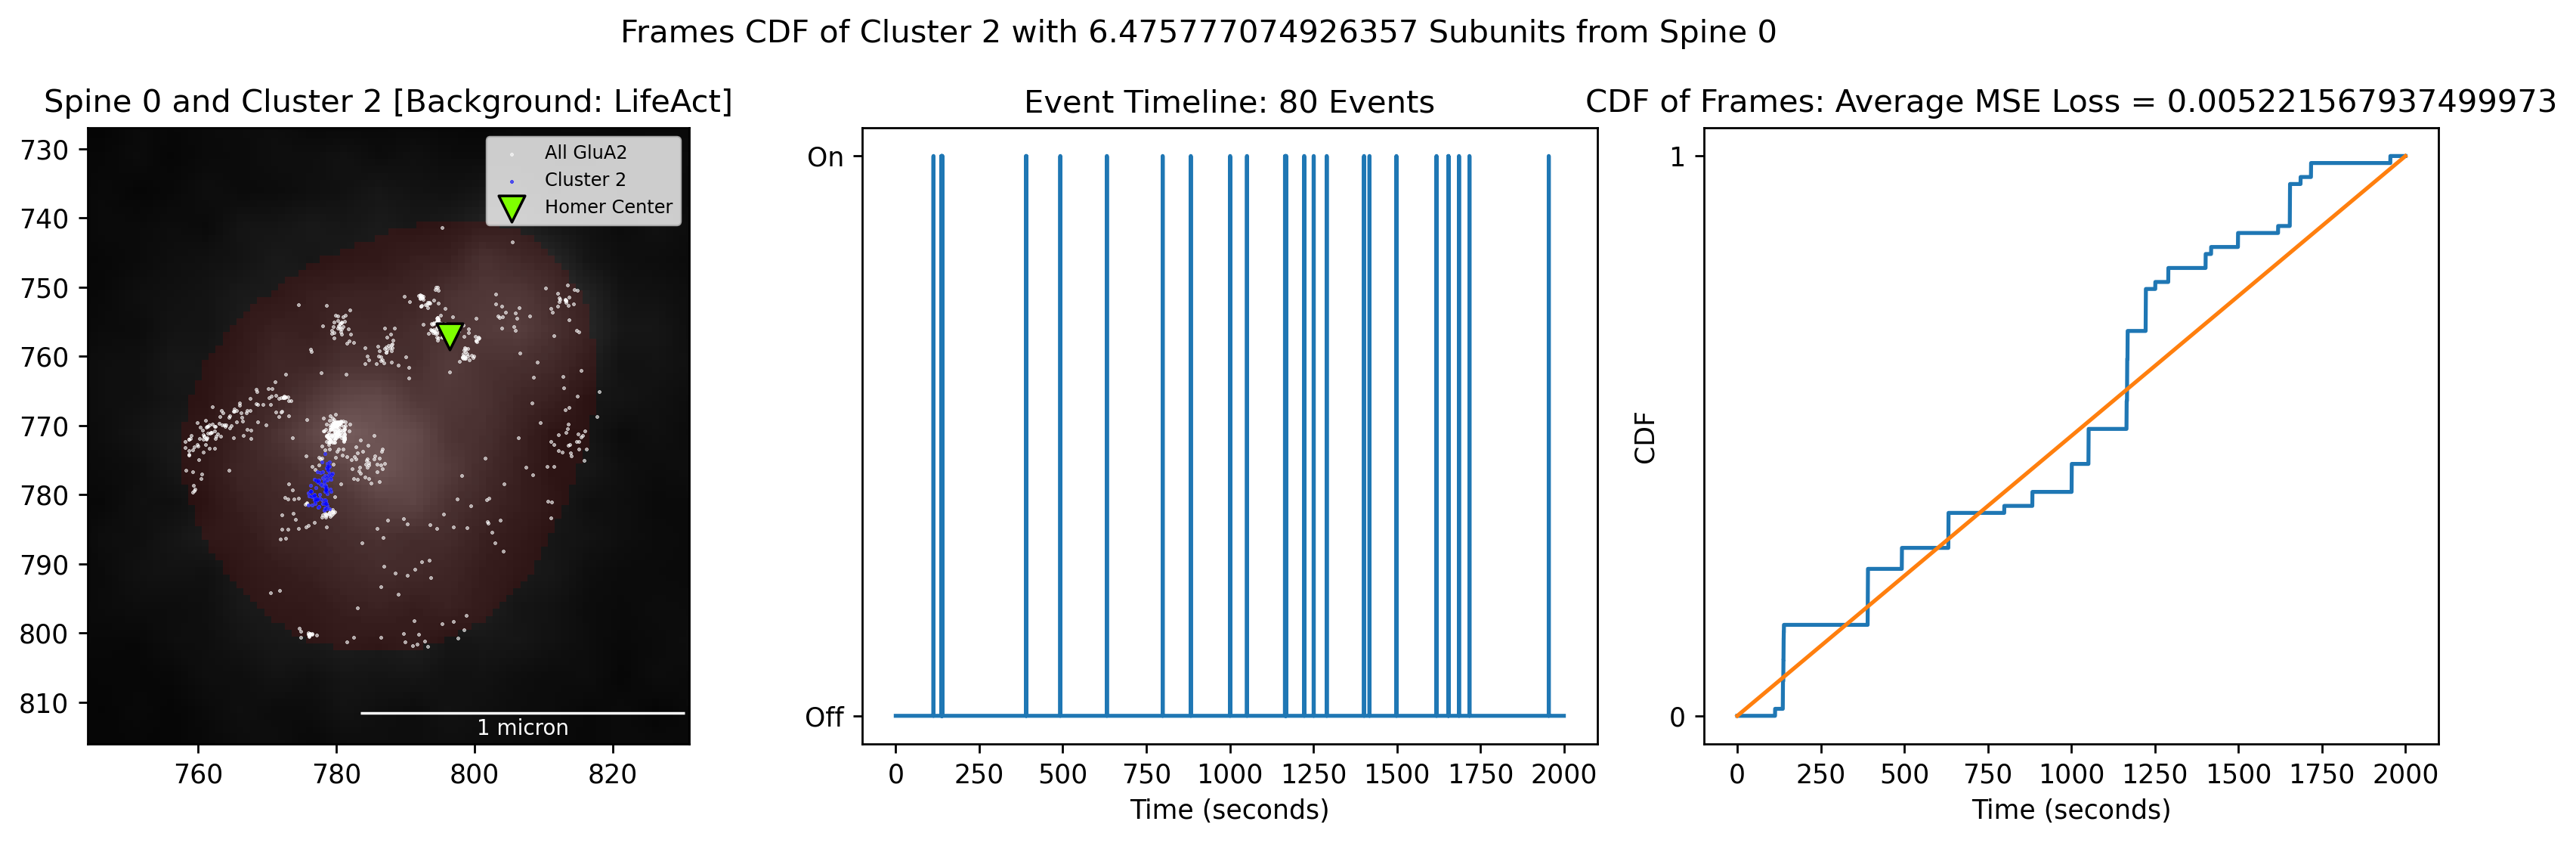

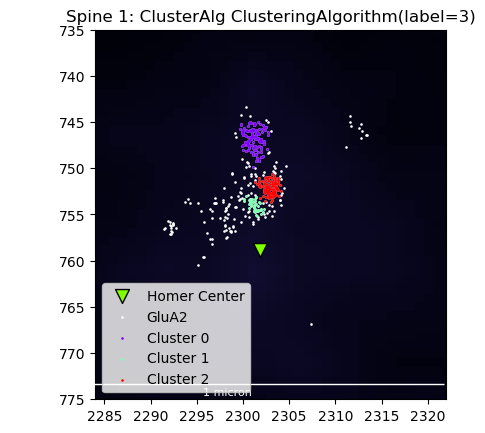

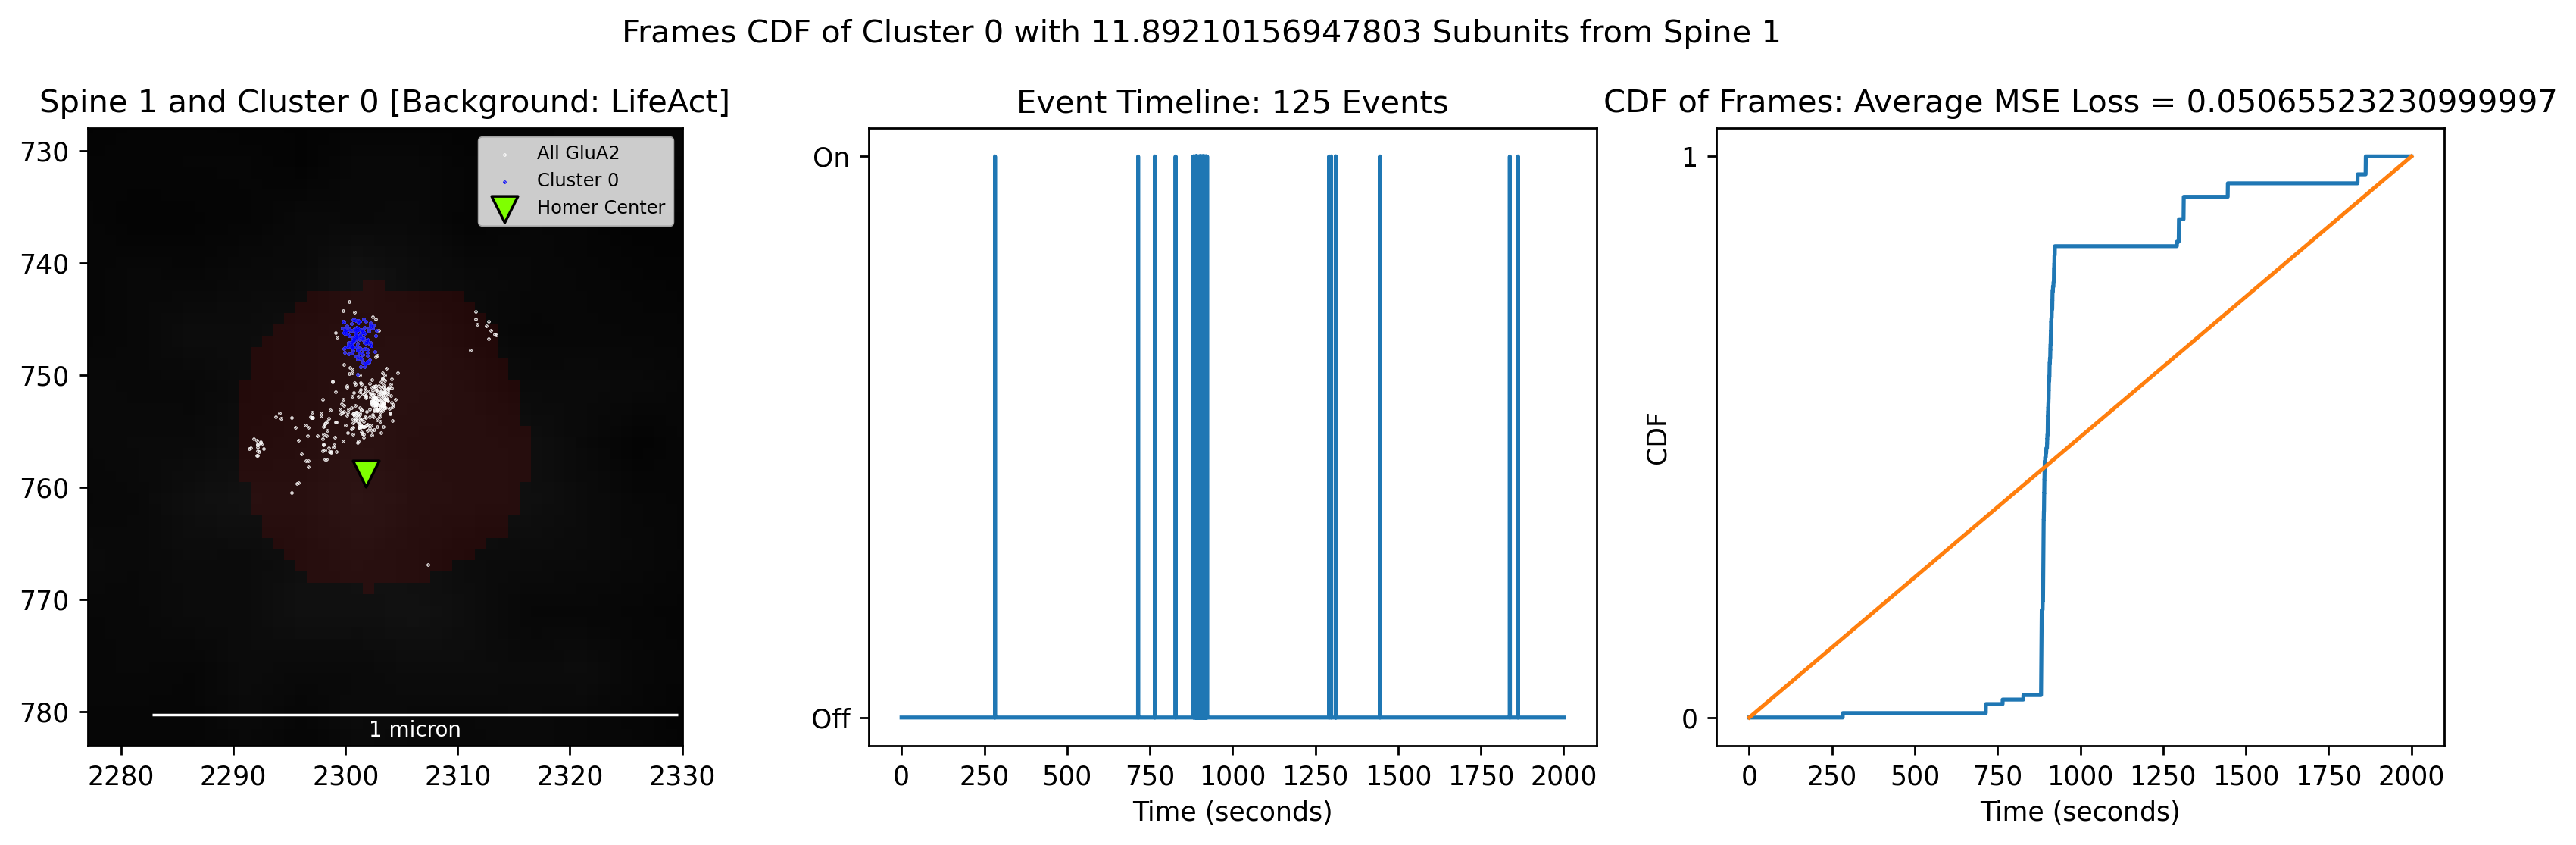

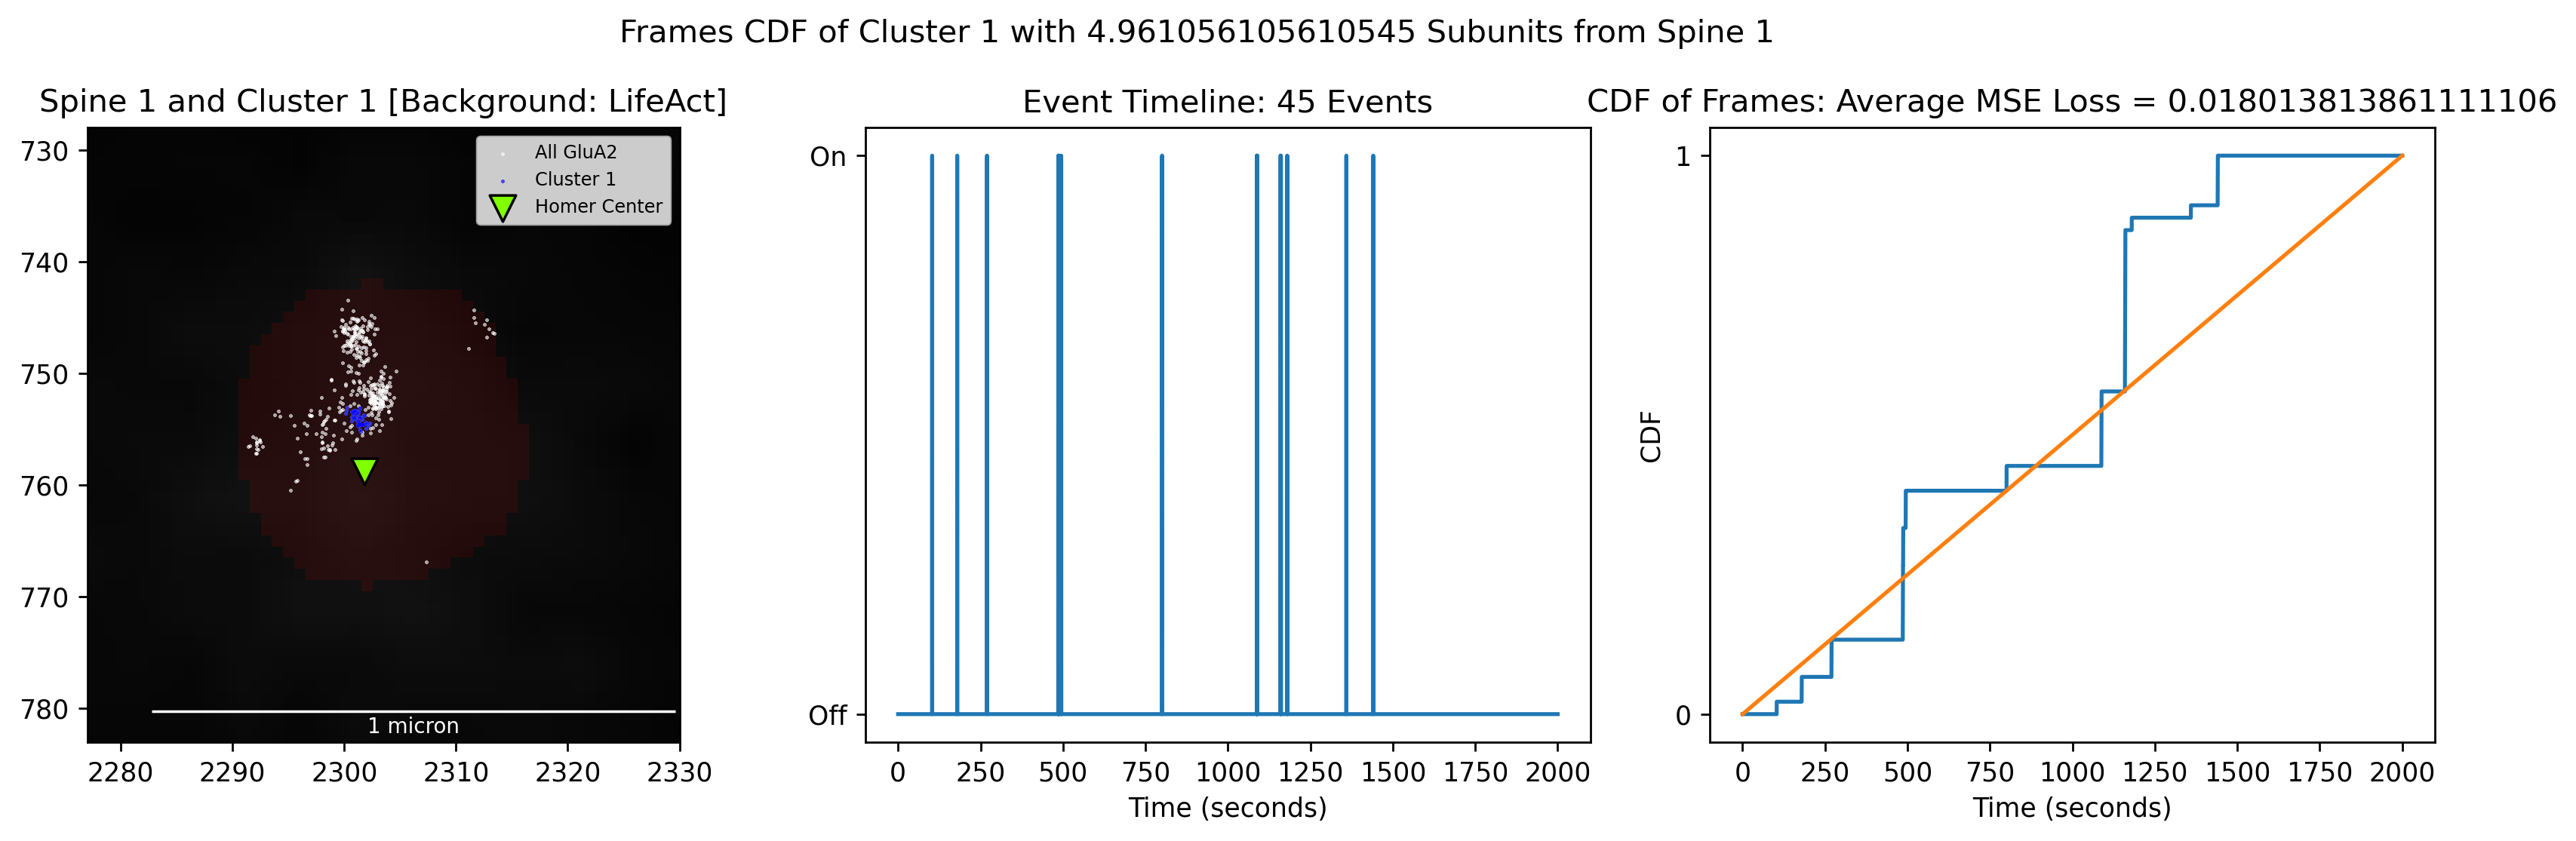

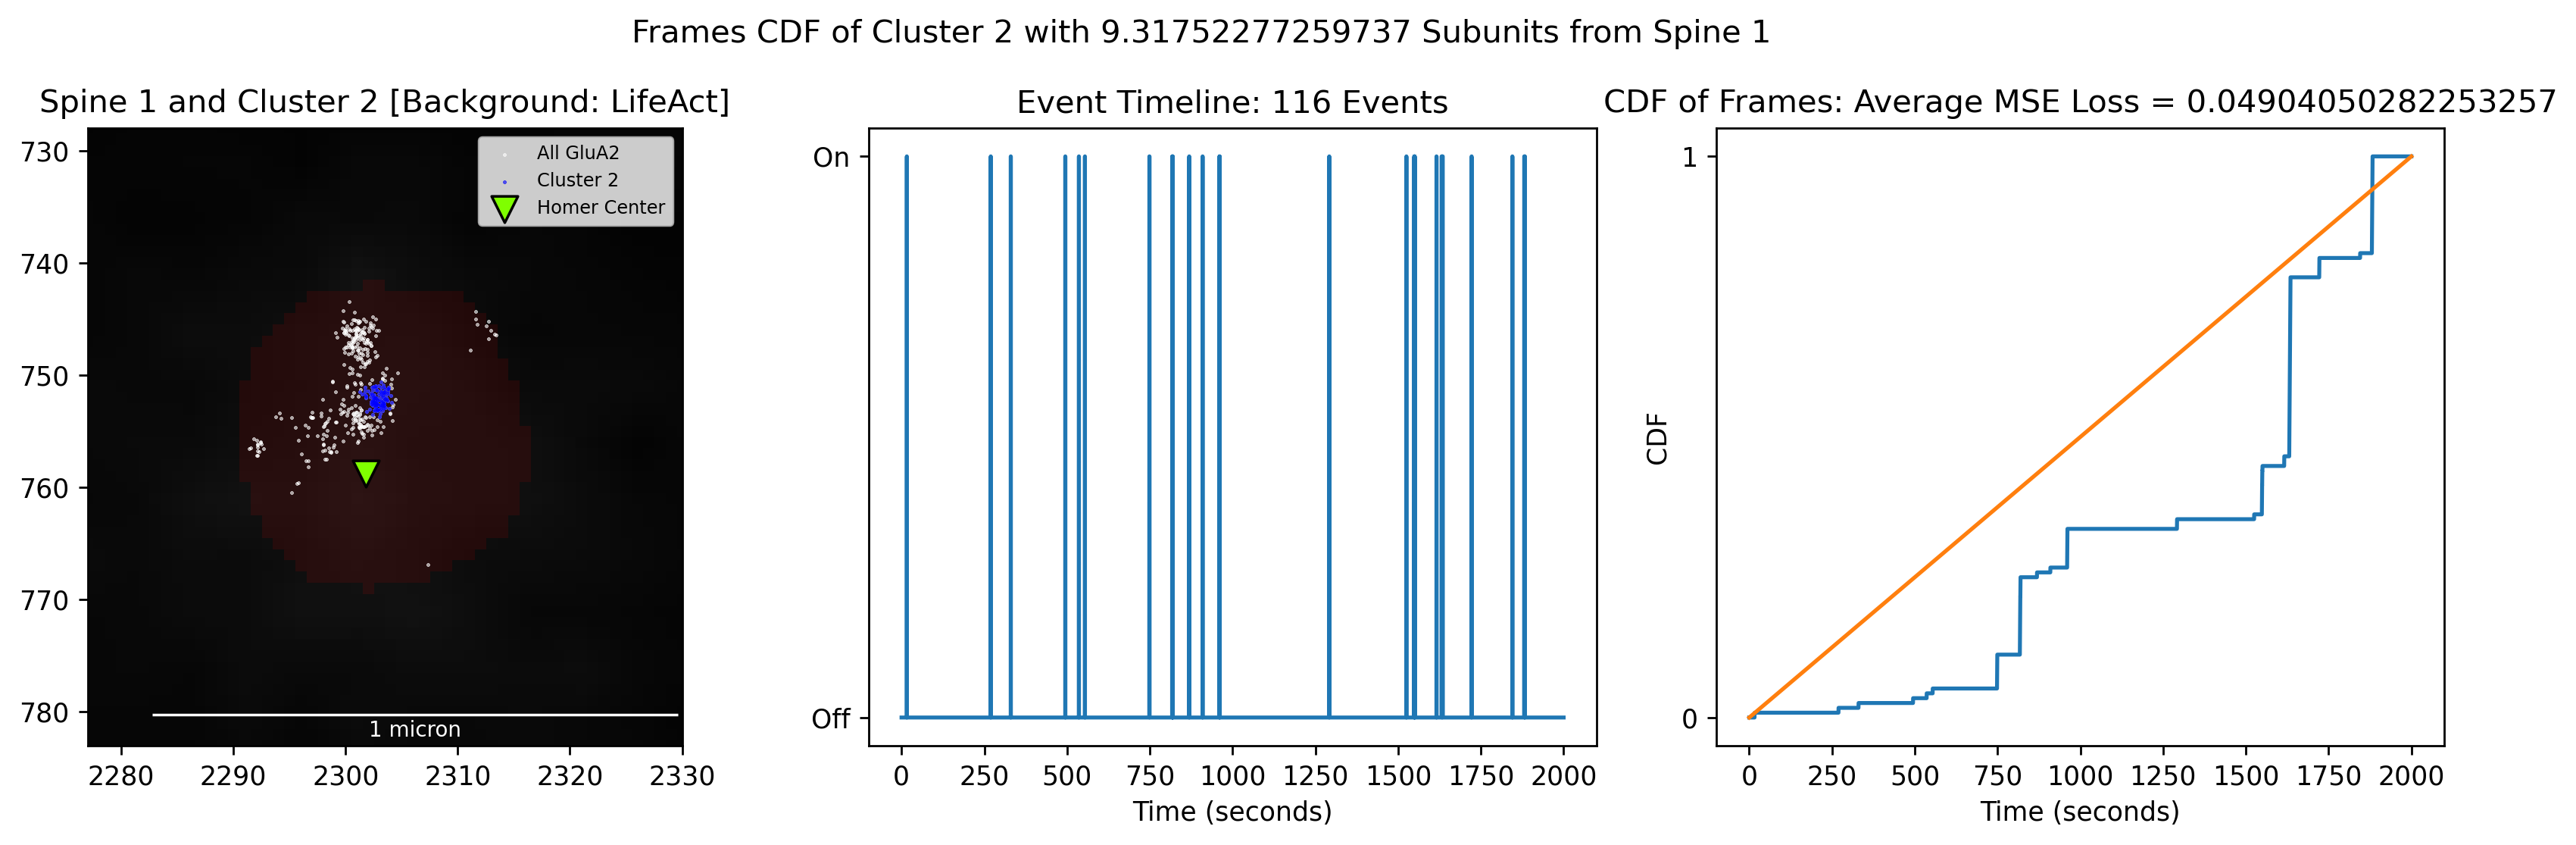

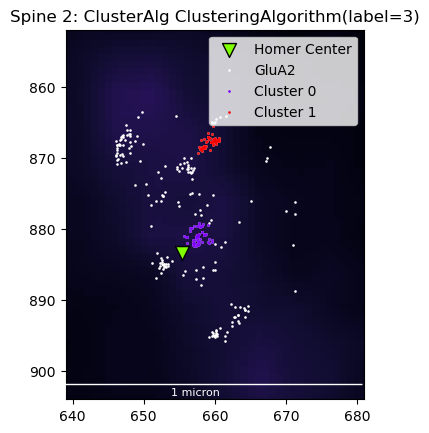

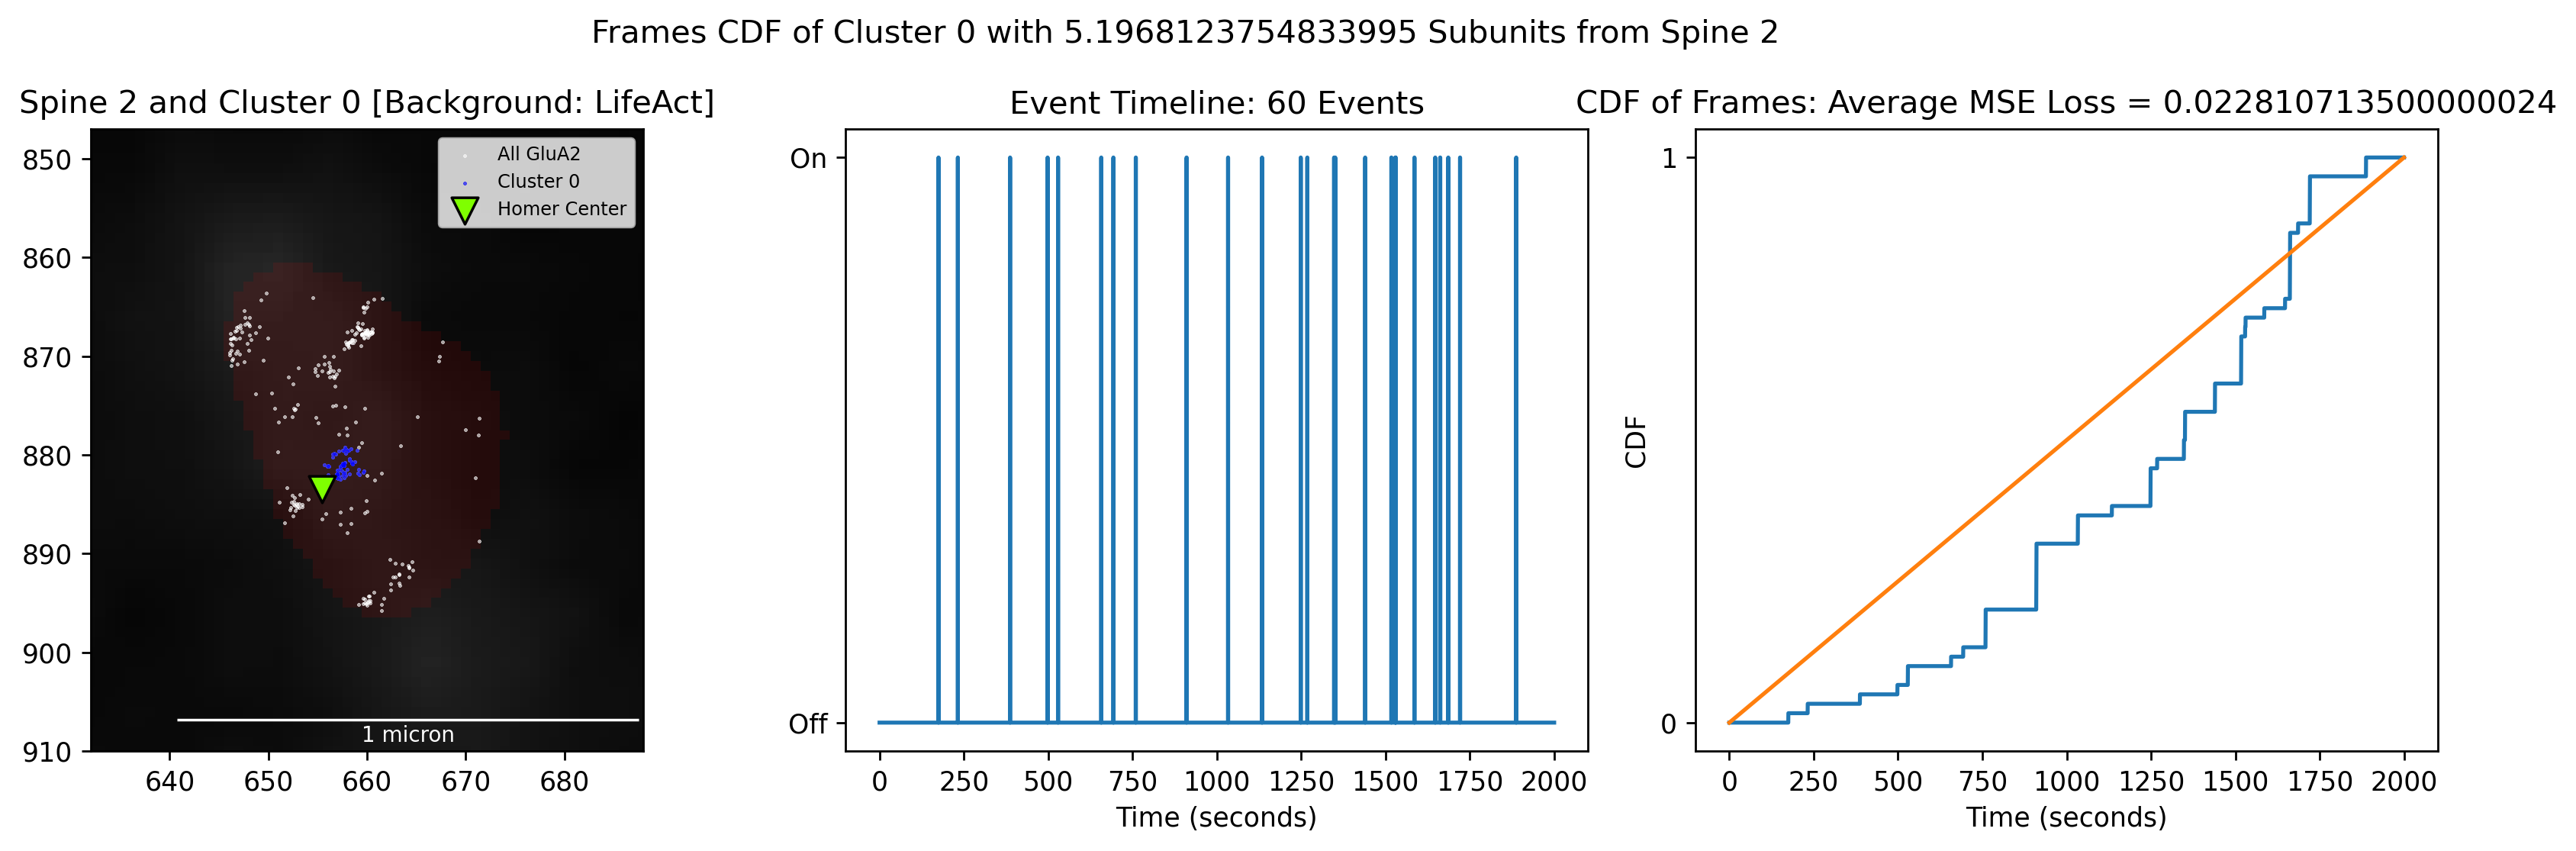

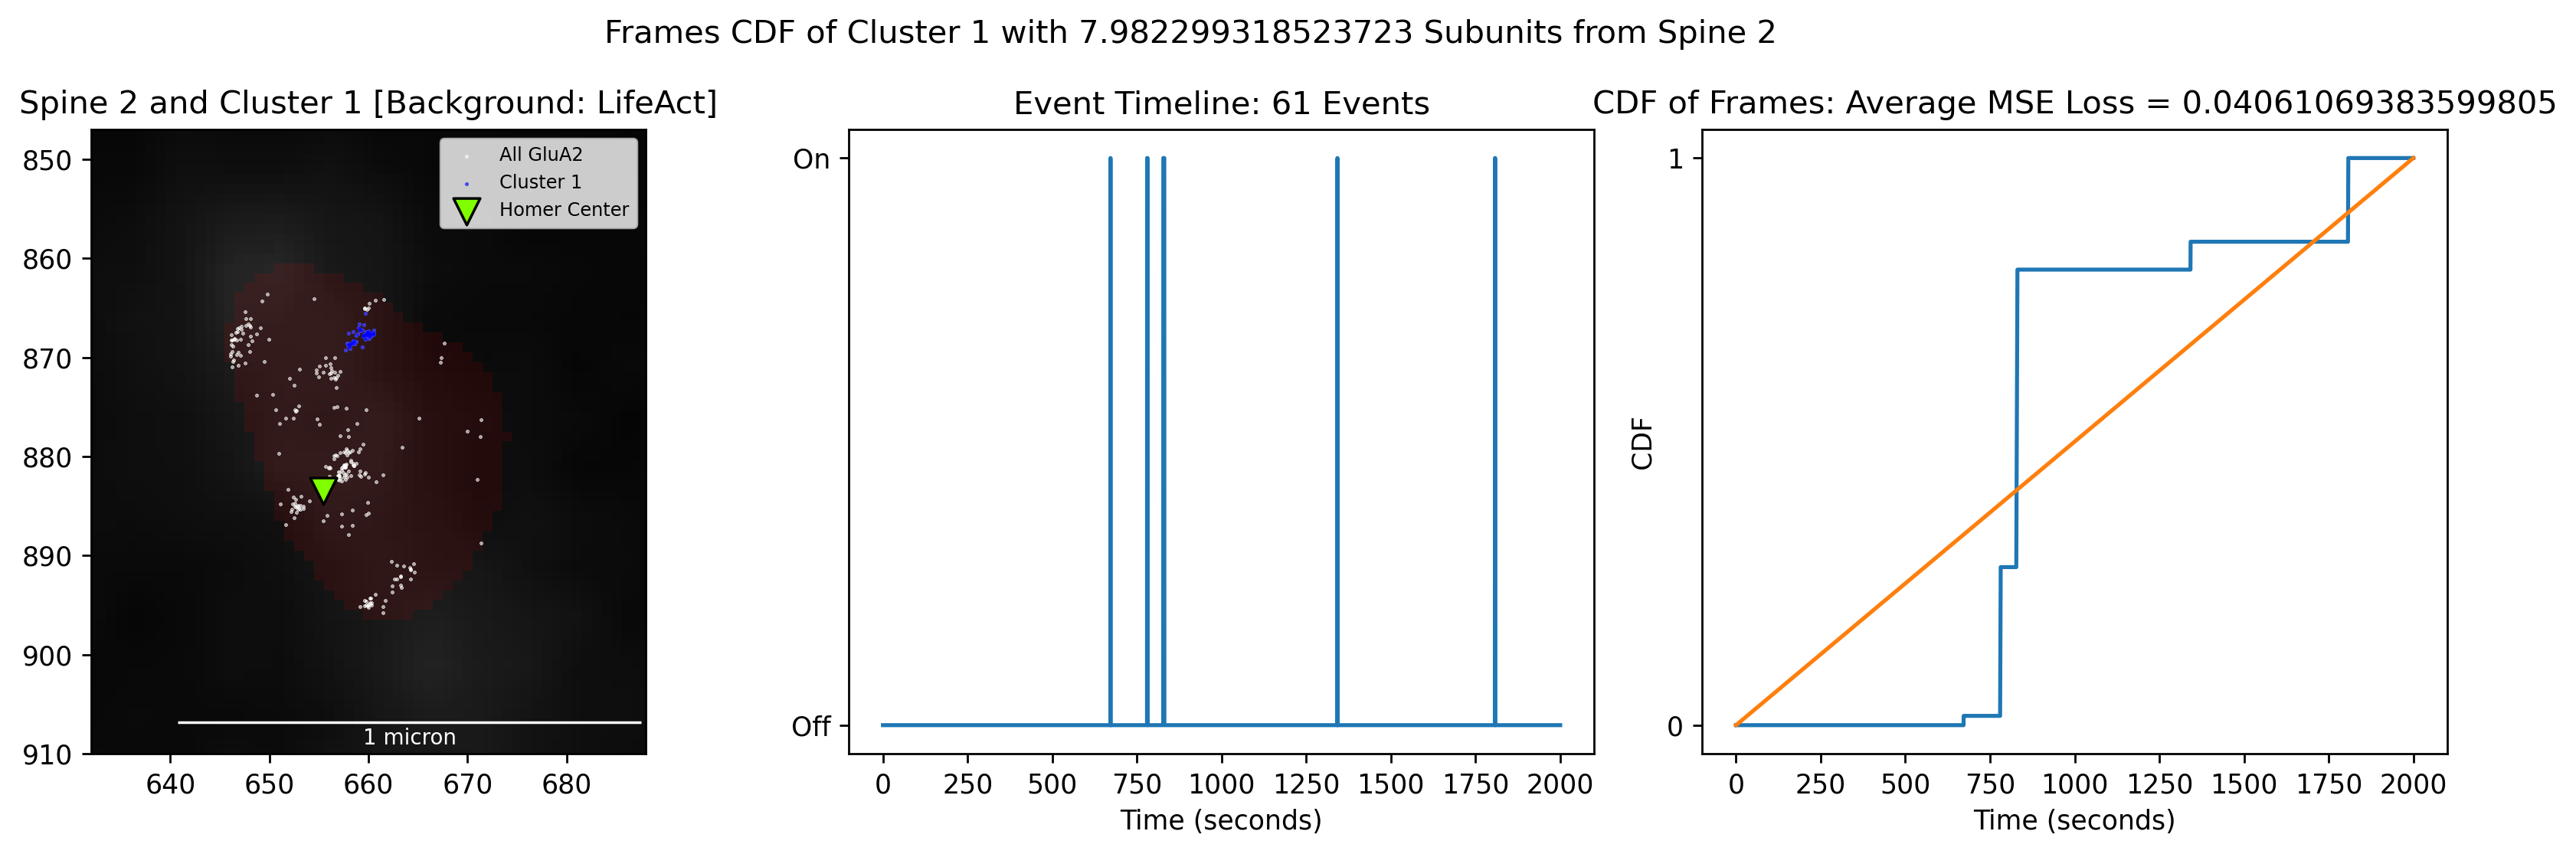

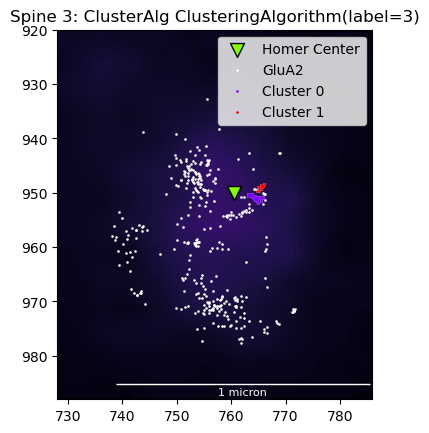

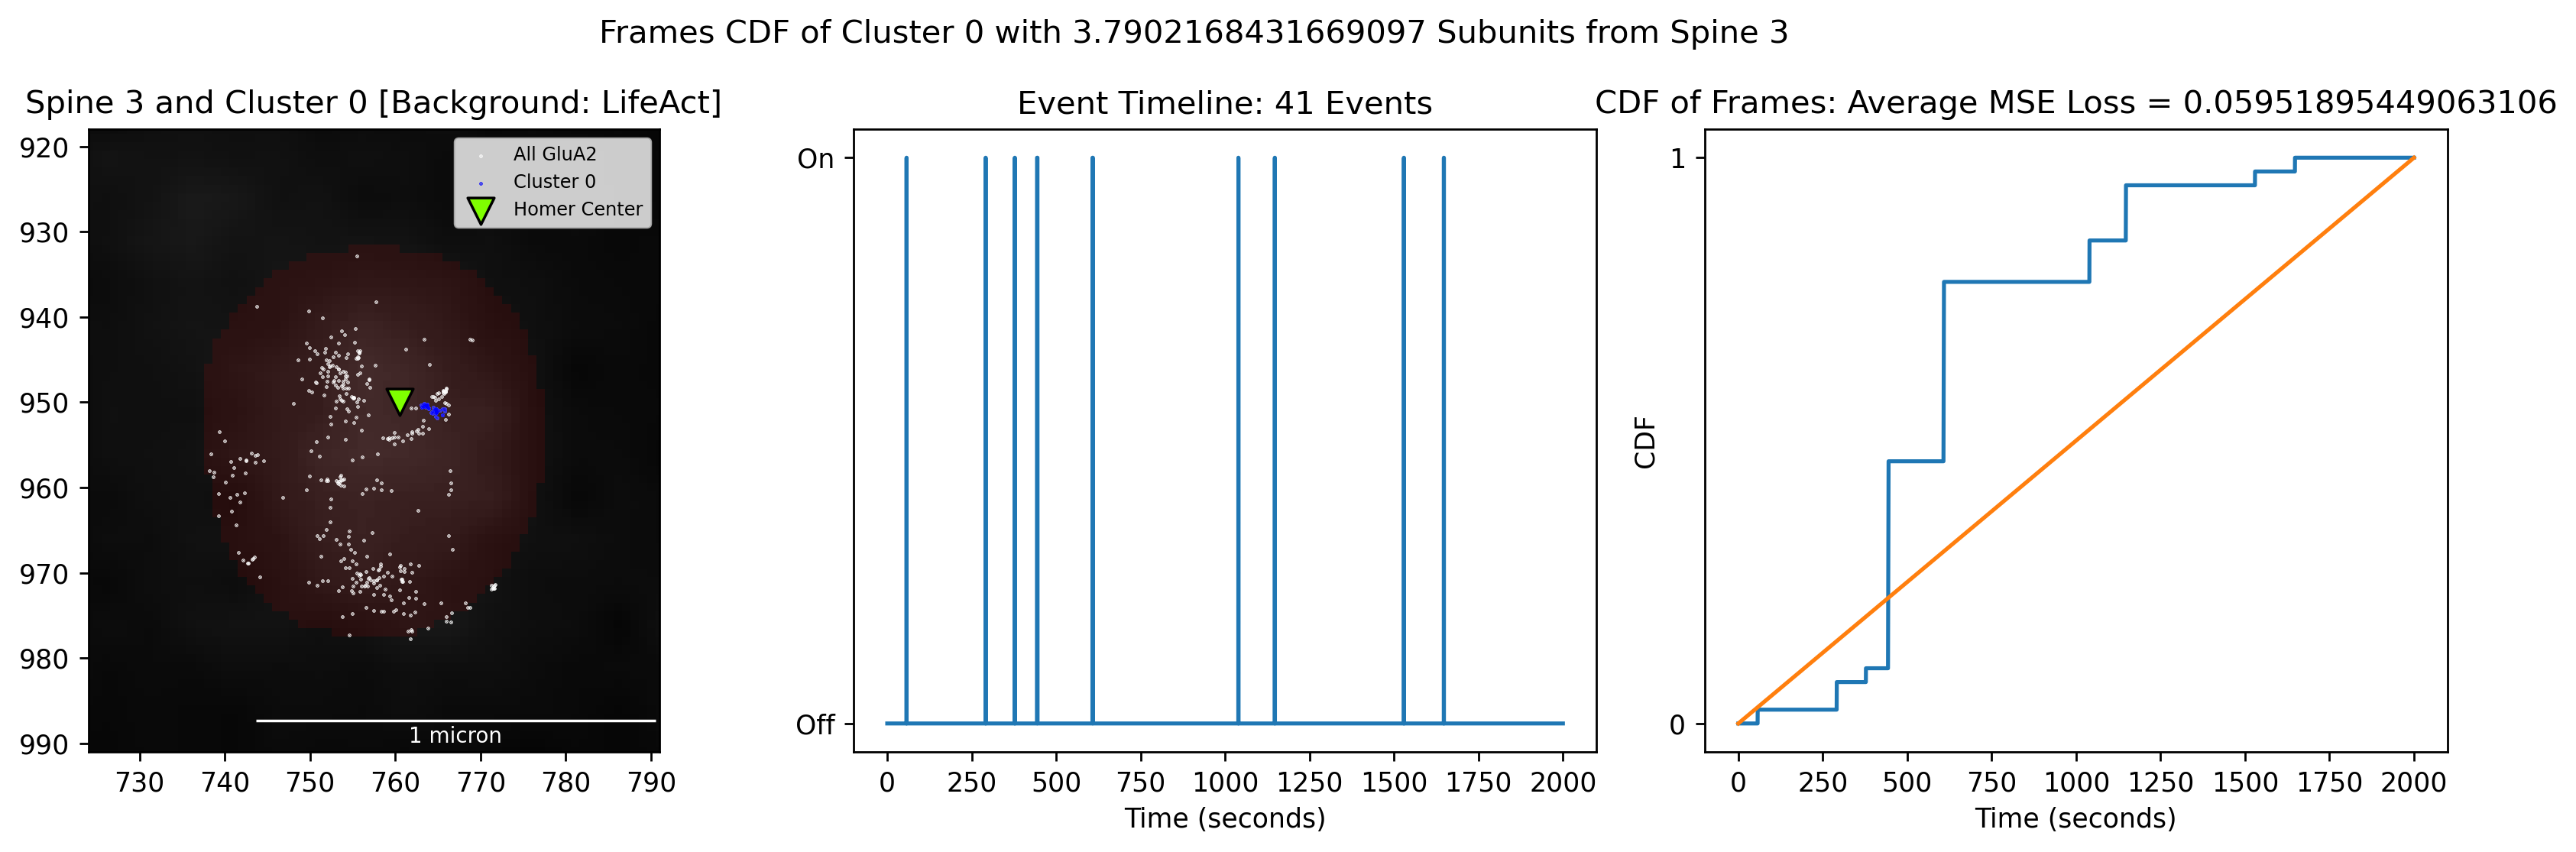

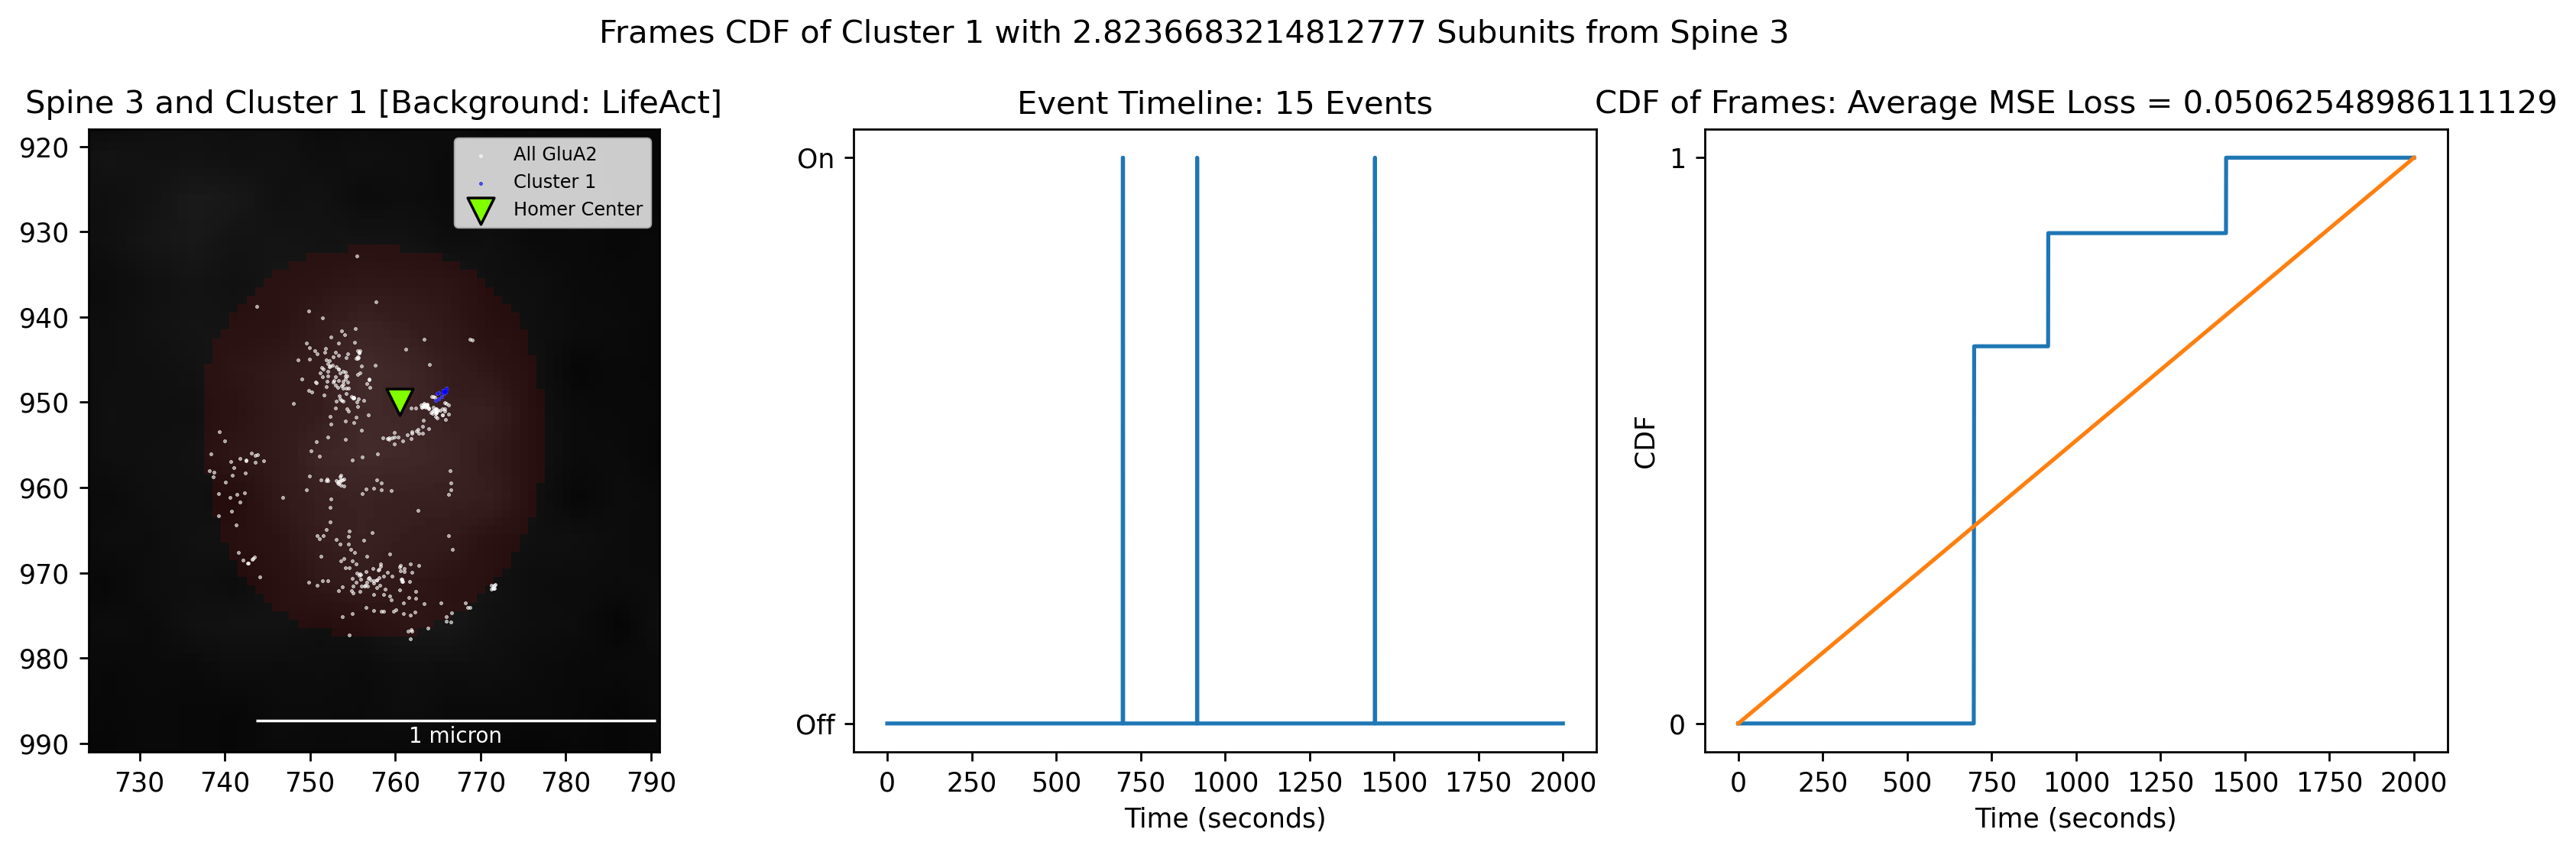

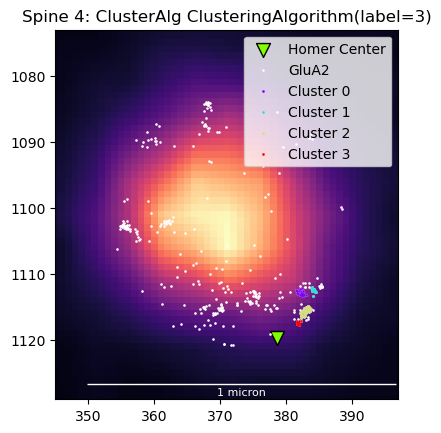

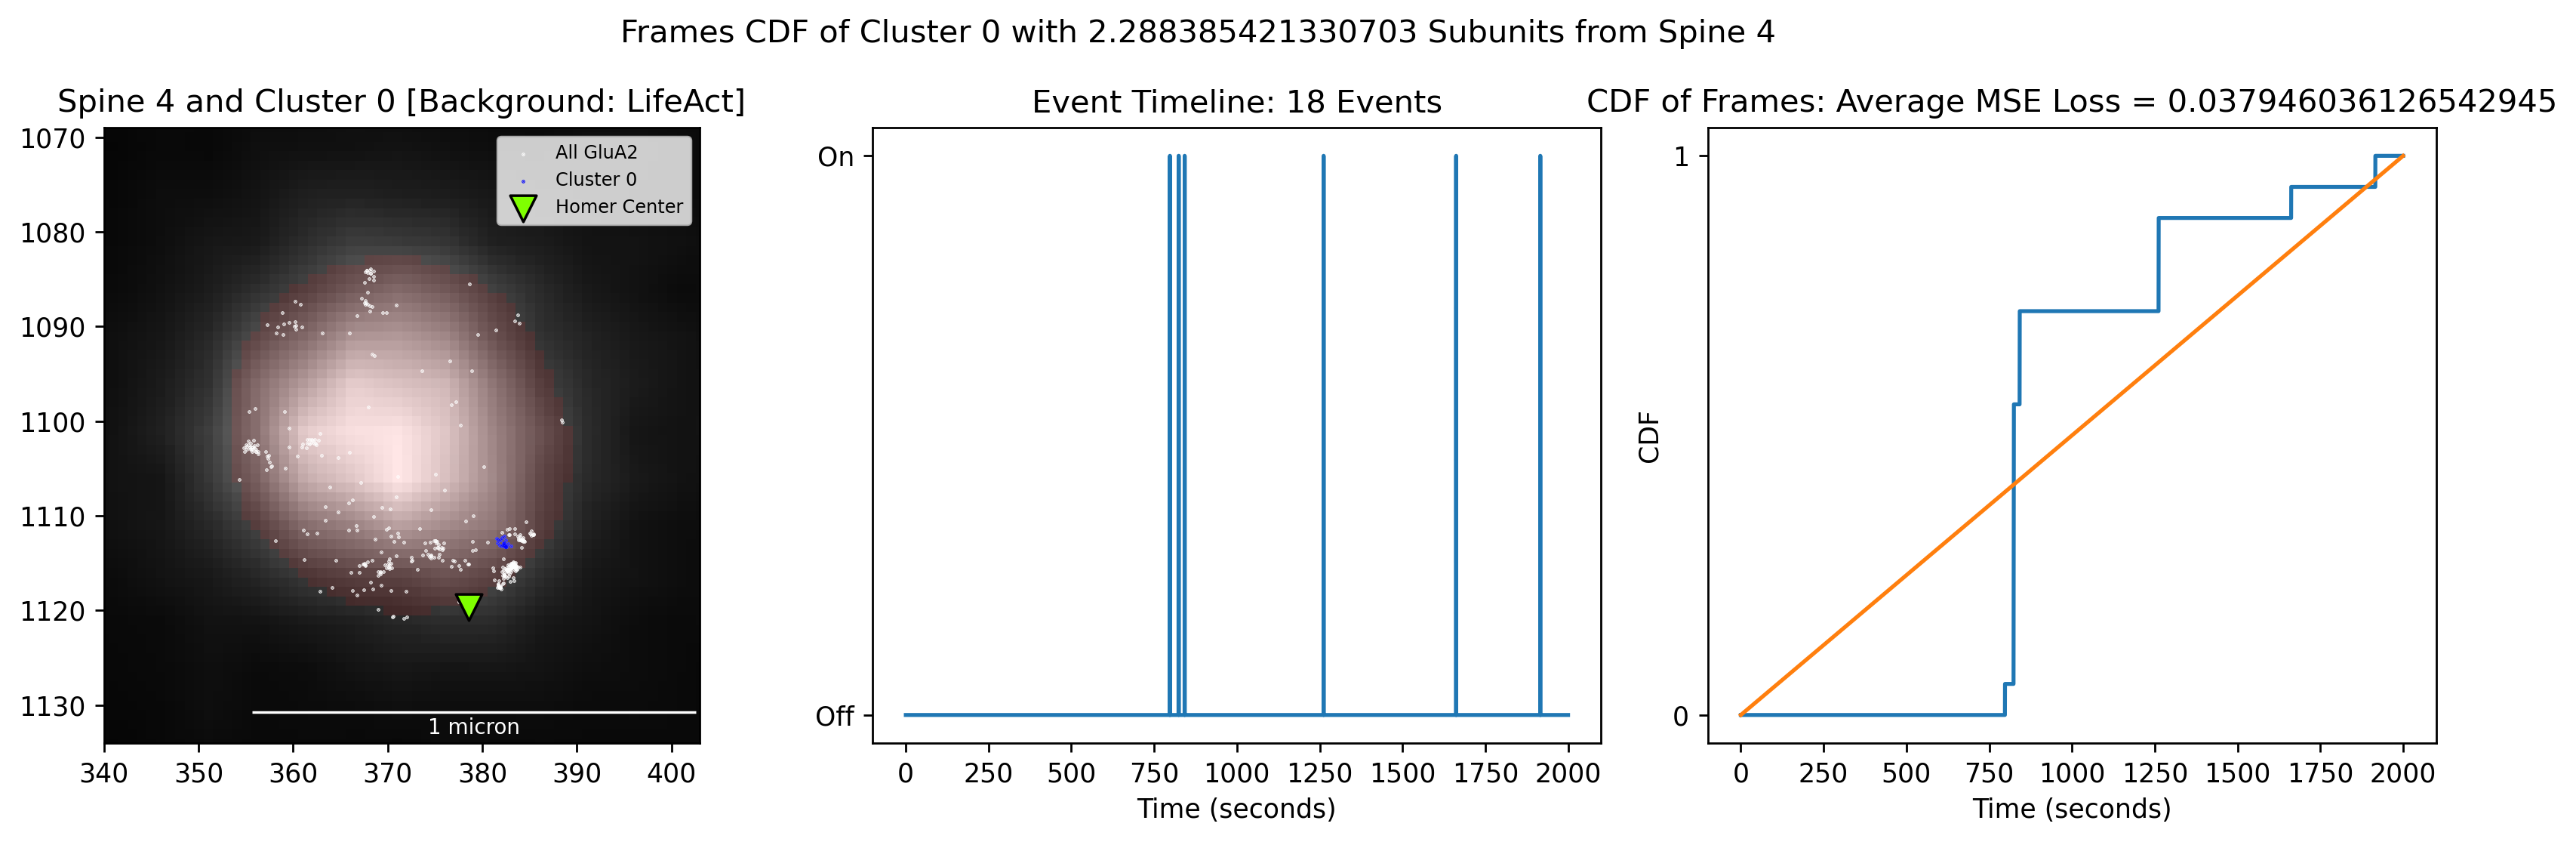

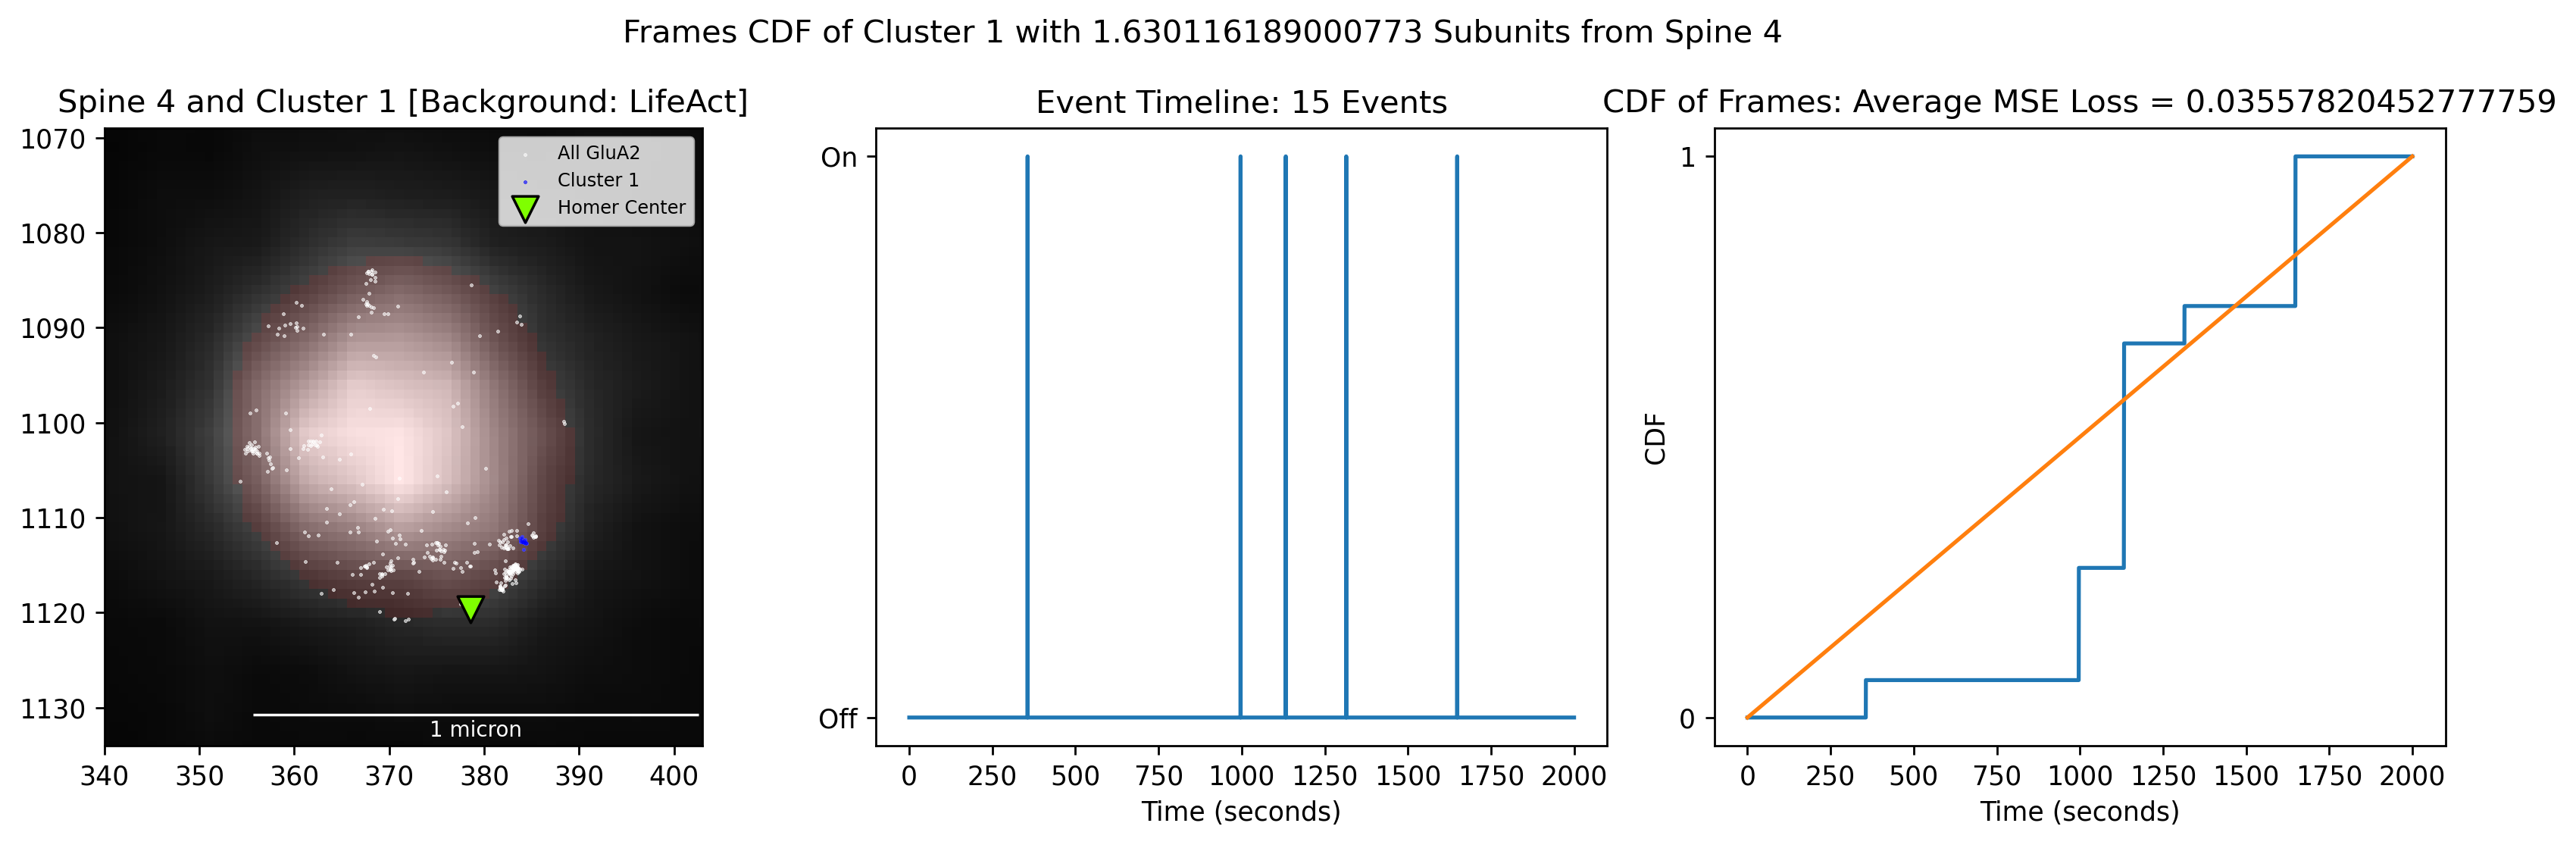

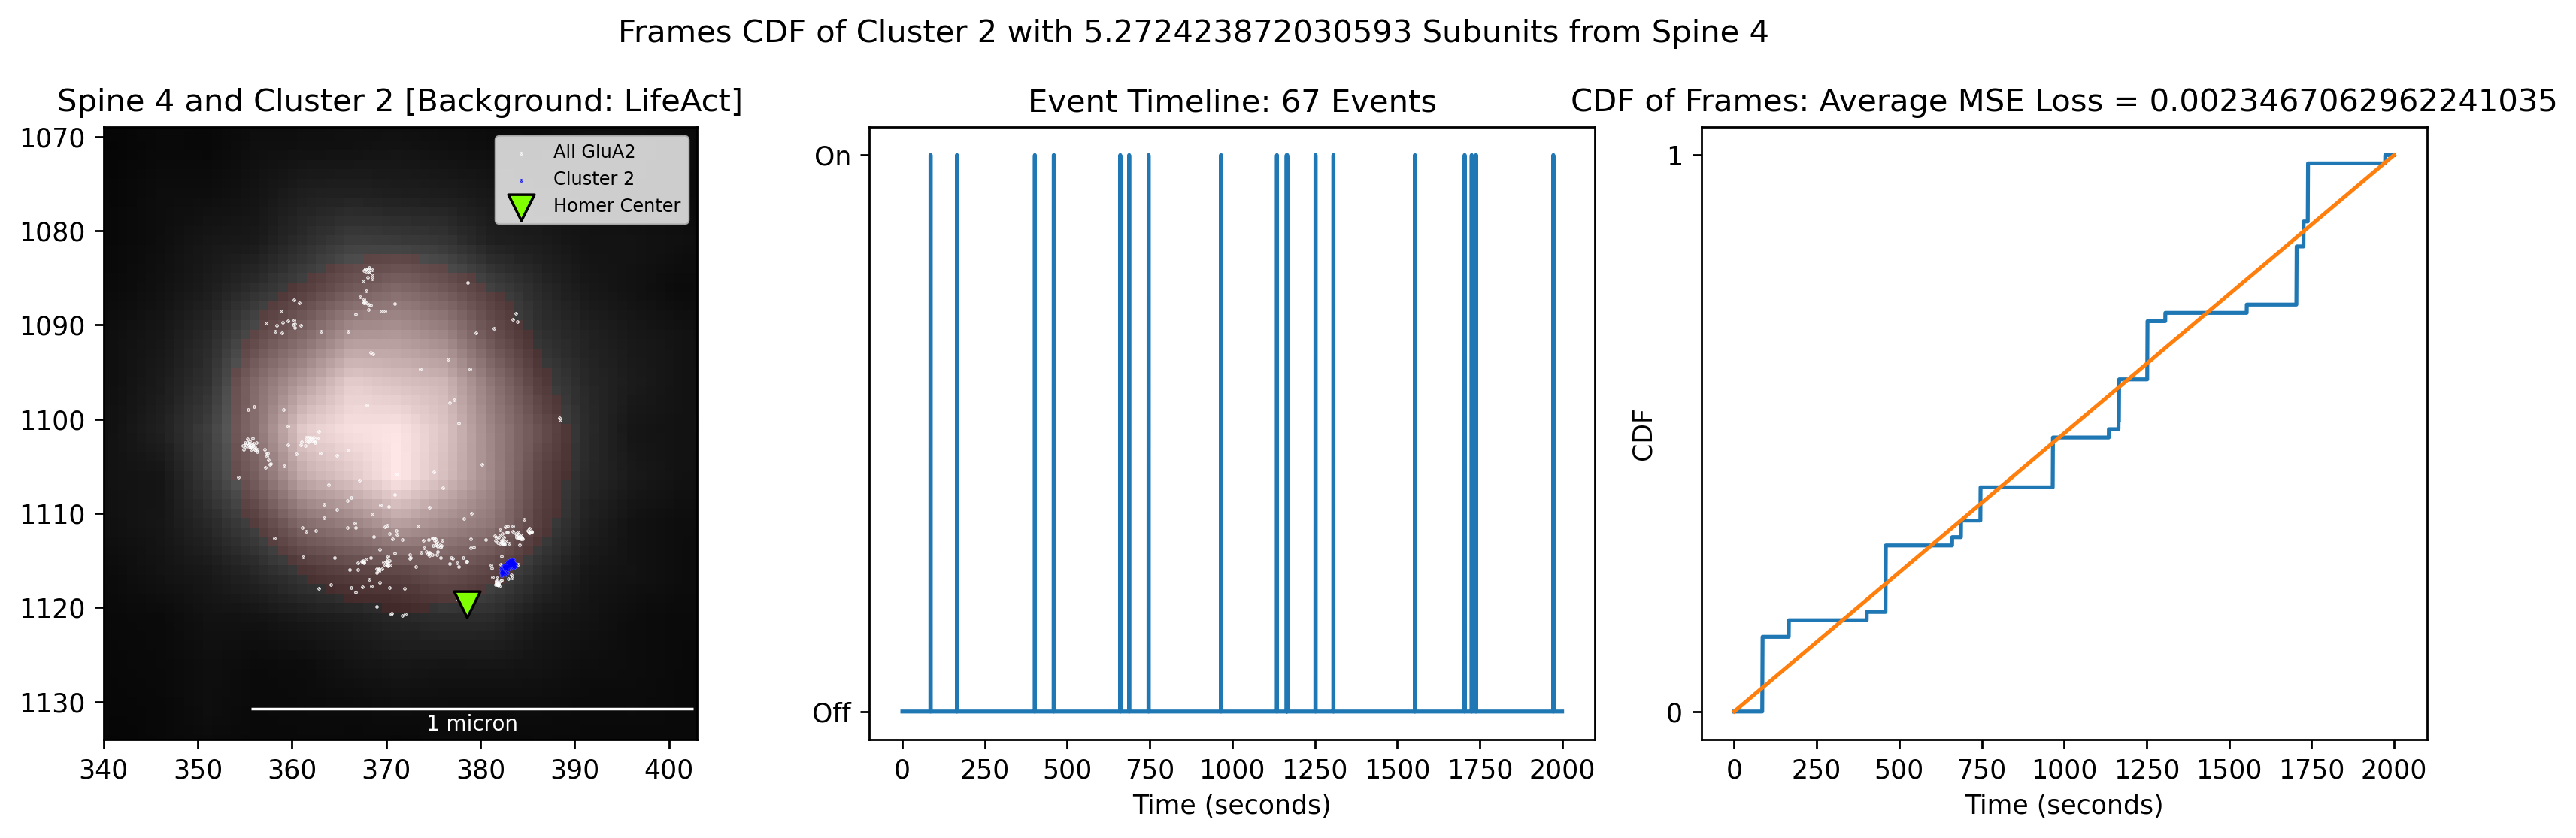

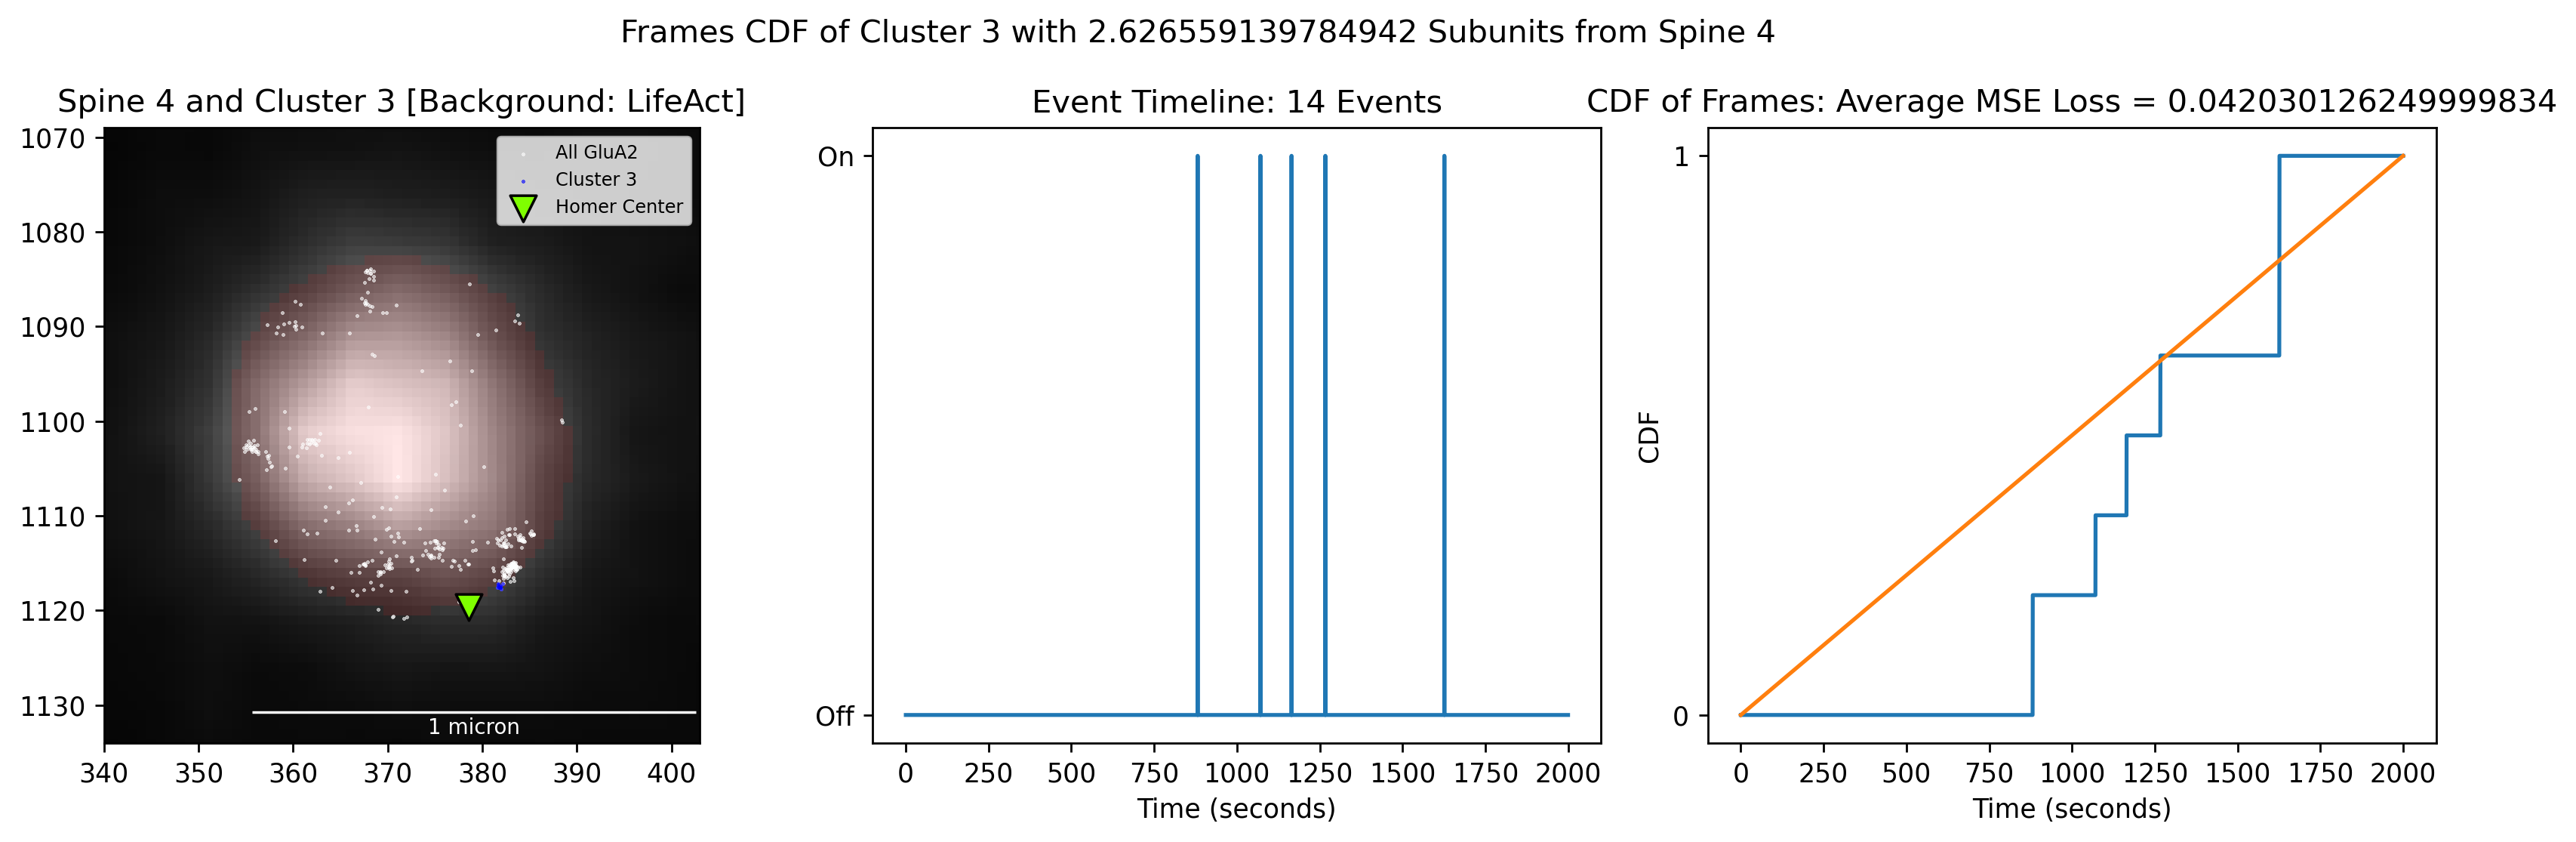

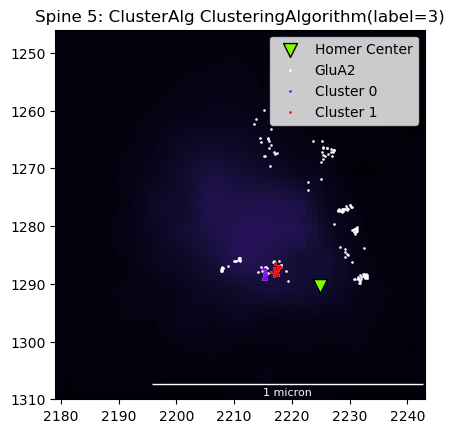

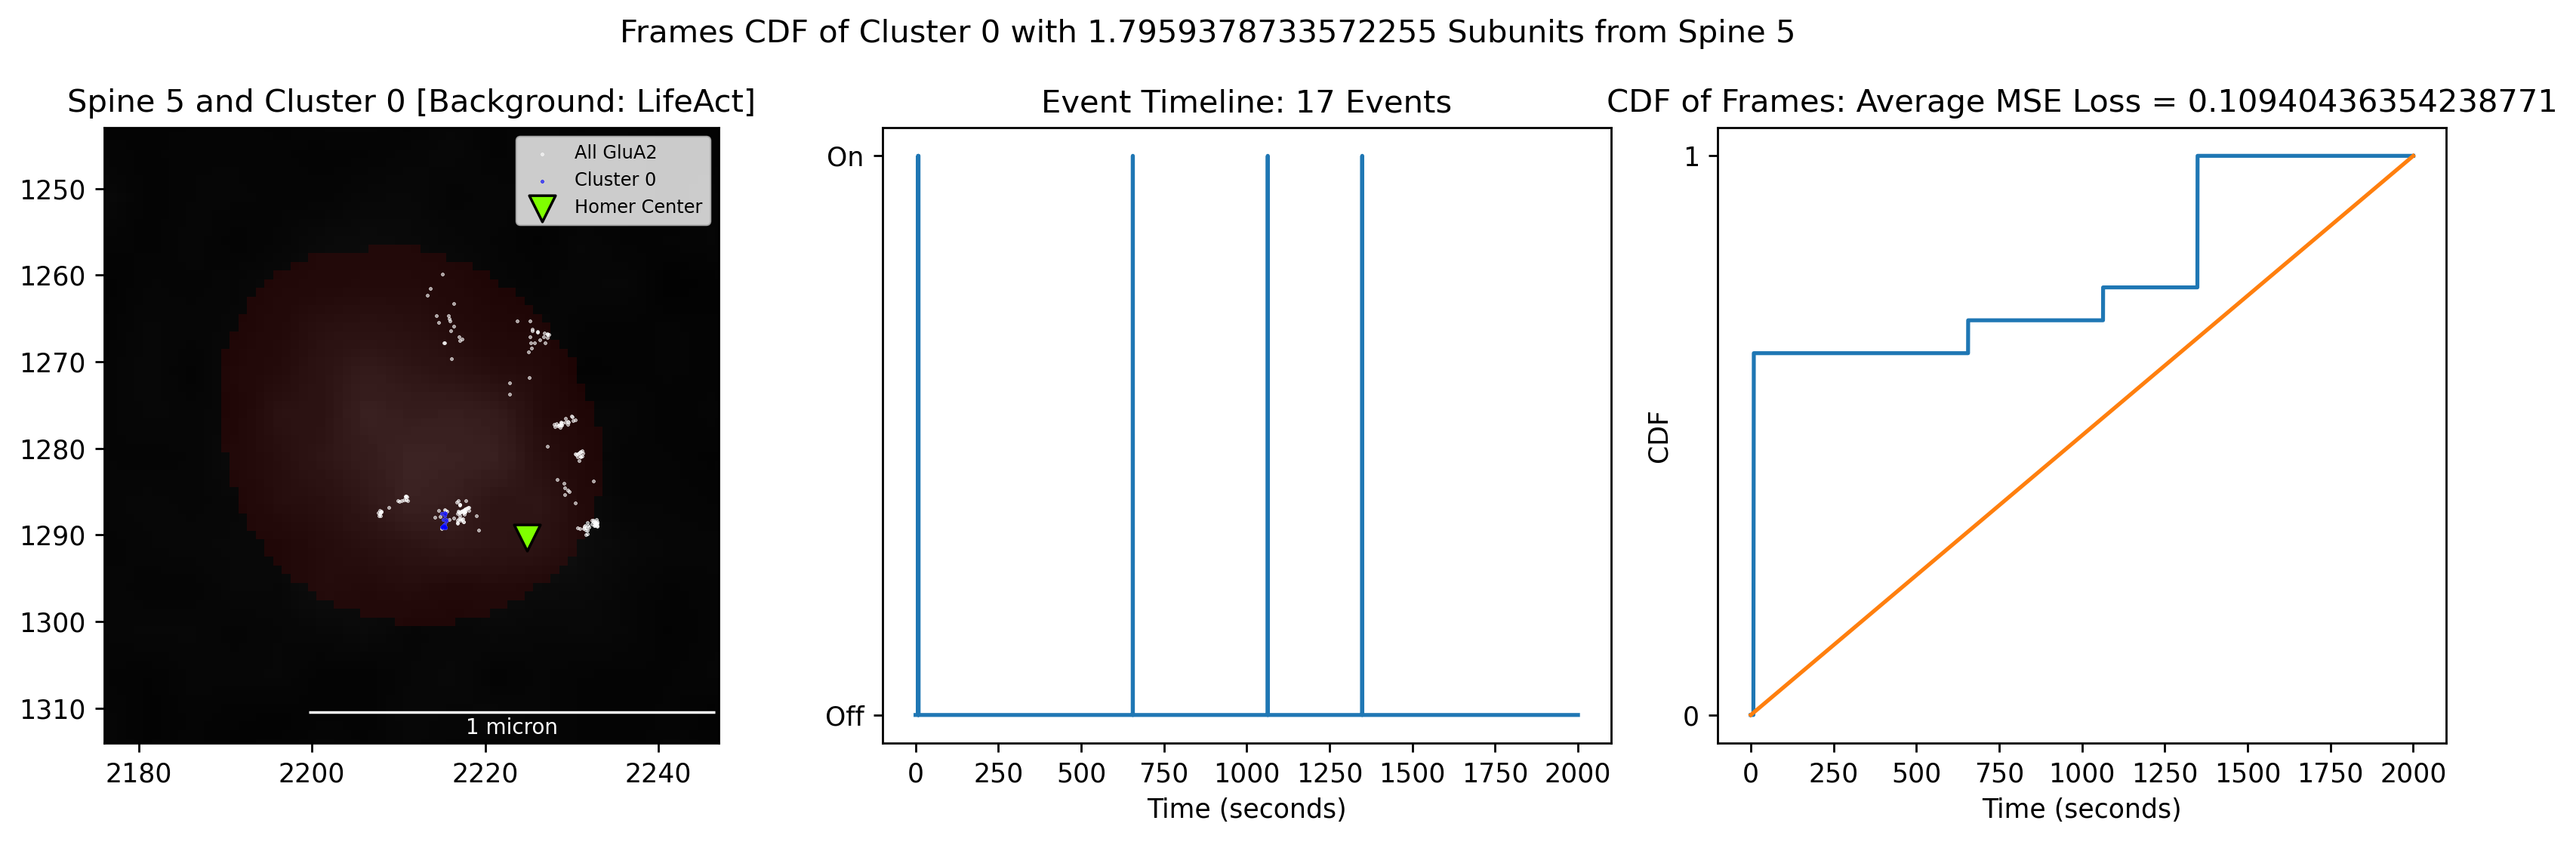

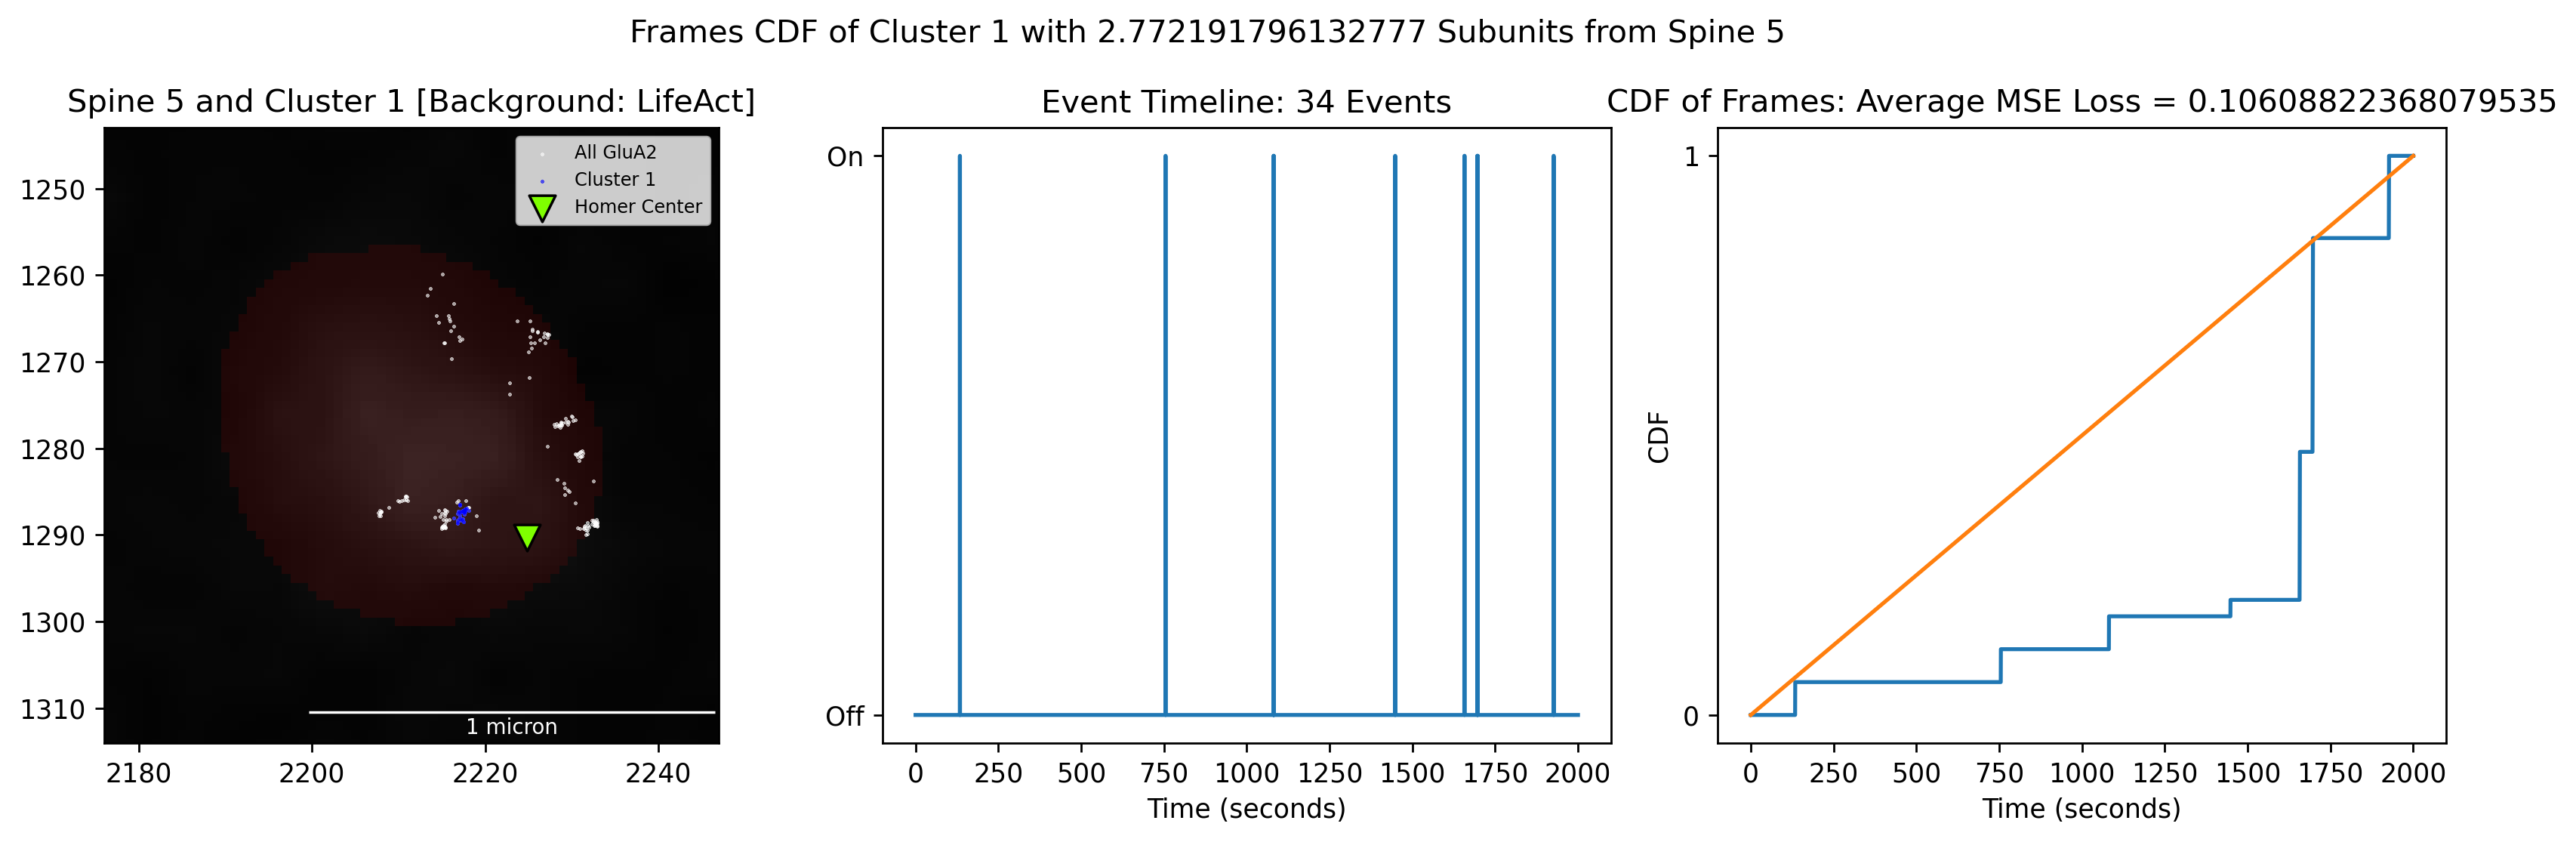

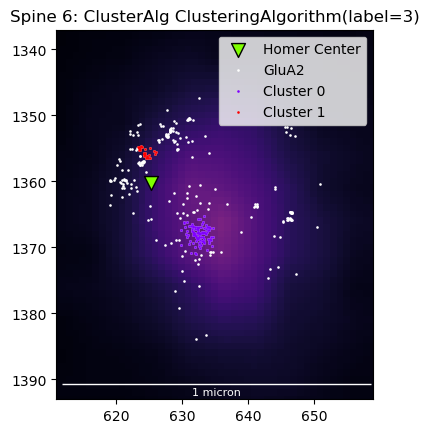

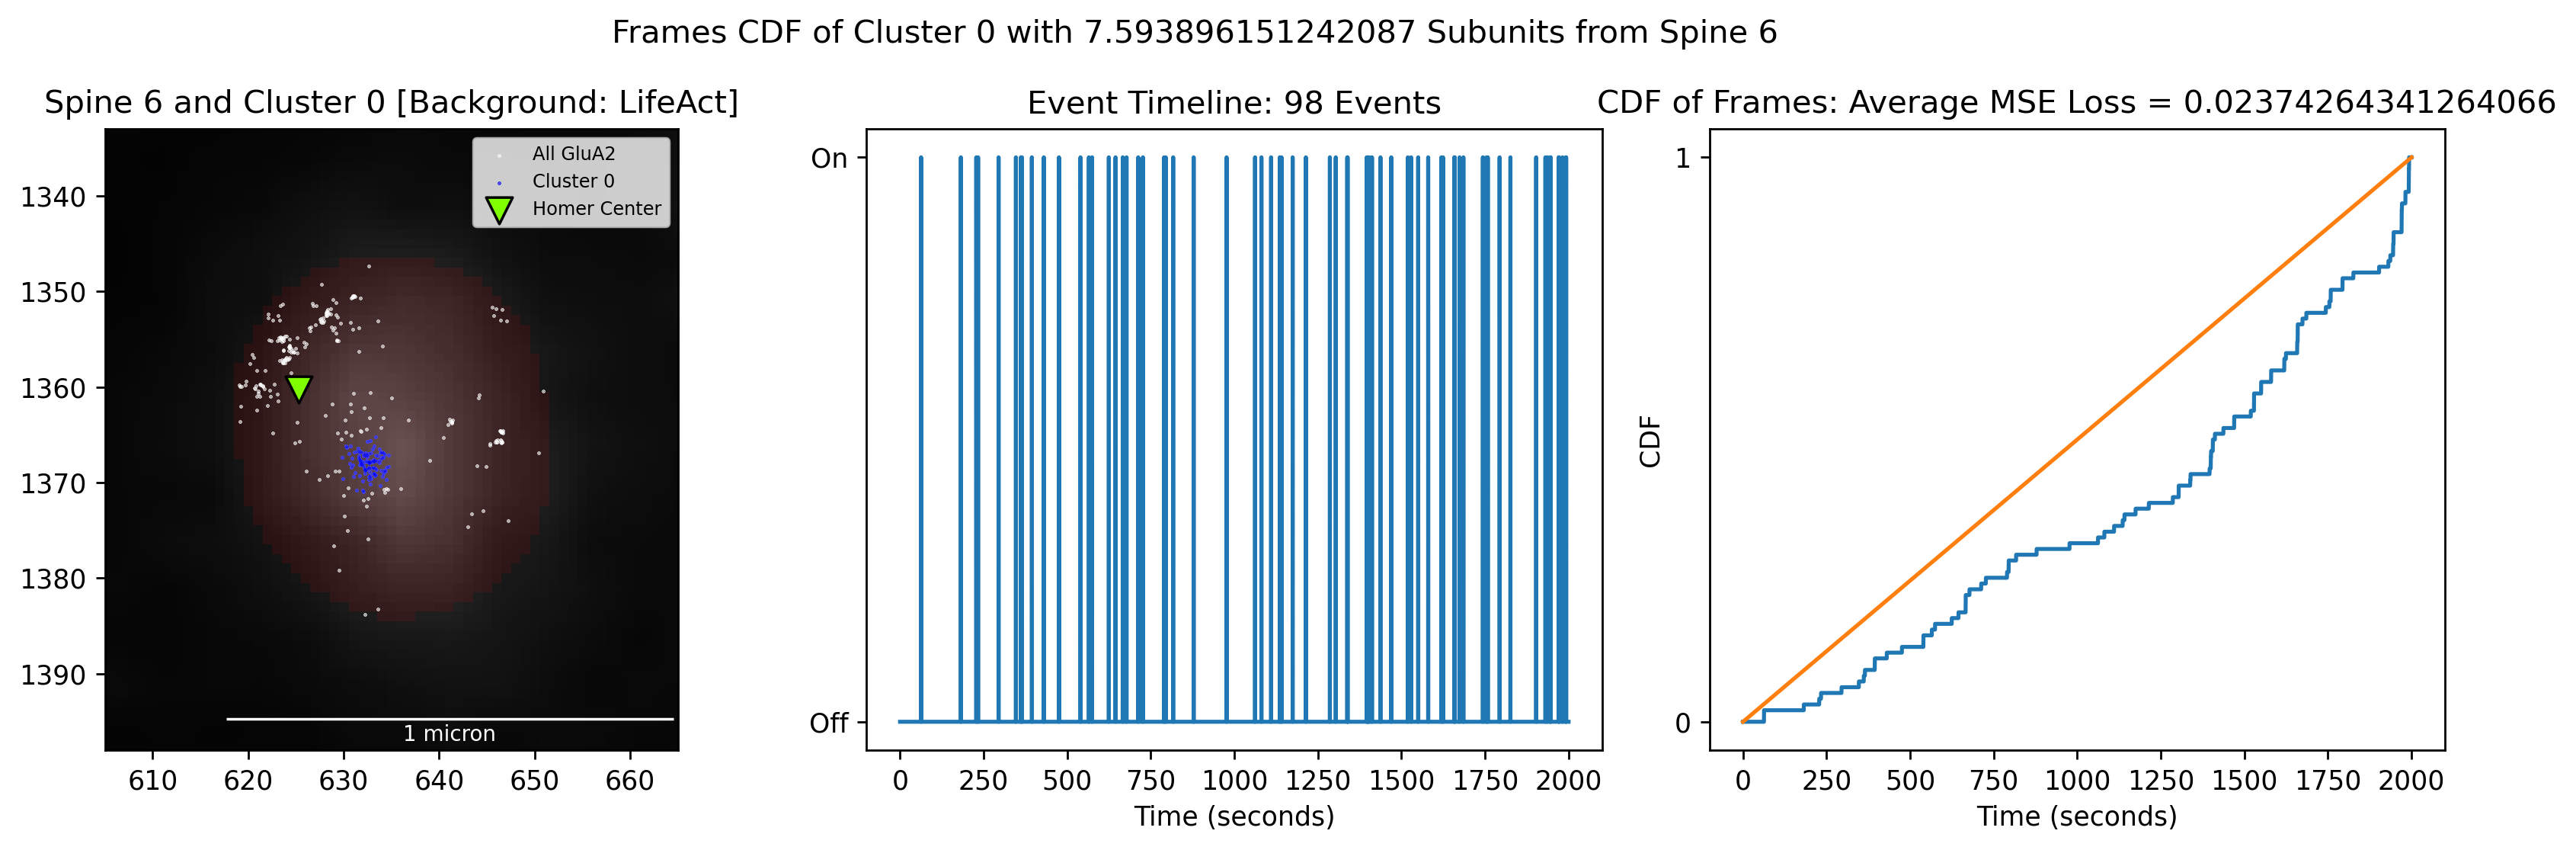

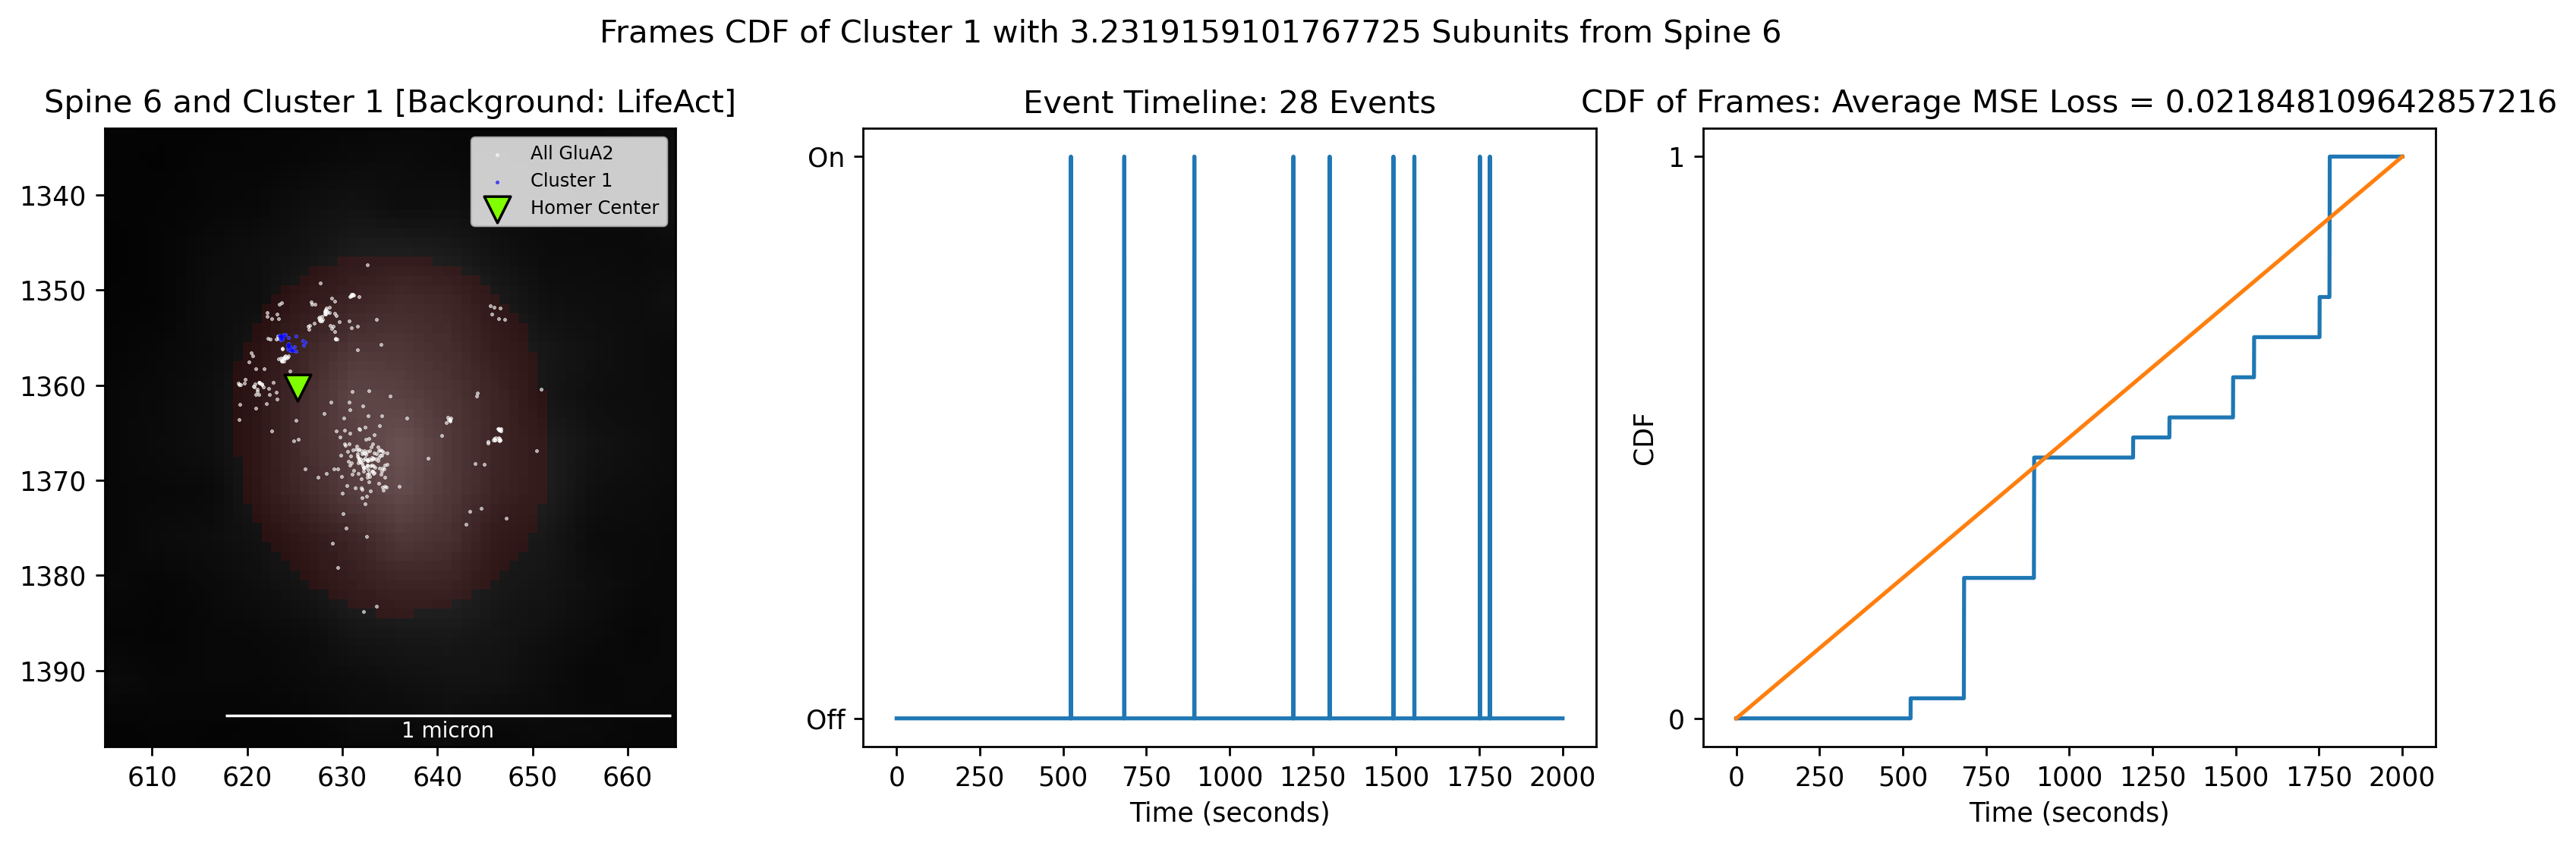

In [4]:
### Plot Clusters in Spines
FOV = FOVs[1][0]
point_label = 'GluA2'
cluster_alg = cluster_algorithms[point_label][1]

plot_spines = True
plot_clusters = True
for idx in range(len(FOV.Spines)):
    spine = FOV.Spines[idx]
    if plot_spines:
        spine.plot(algs=cluster_alg, life_act=FOV.life_act, Points=spine.points[point_label])
    if plot_clusters:
        for cluster in spine.get_clusters(cluster_alg):
            cluster.plot_frames_cdf()

In [5]:
point_label = 'GluA2'
cluster_alg = cluster_algorithms[point_label][1]
clusters = []
for FOV in FOVs[1]:
    for idx in range(len(FOV.Spines)):
        spine = FOV.Spines[idx]
        for cluster in spine.get_clusters(cluster_alg):
            clusters.append(cluster)

In [6]:
cluster_data = [[], [], [], []] # areas, sizes, distances, MSEs
max_subunits = 50
max_MSE_loss = 0.10

for cluster in clusters:
    if cluster.subunits < max_subunits and cluster.MSE_loss() < max_MSE_loss:
        cluster_data[0].append(cluster.cluster_area())
        cluster_data[1].append(cluster.subunits)
        cluster_data[2].append(cluster.distance_to_nearest_homer)
        cluster_data[3].append(cluster.MSE_loss())
cluster_data = np.array(cluster_data)
print(cluster_data.shape)

cluster_data = cluster_data[:, np.argsort(cluster_data[2])] # sort by distance to Homer center

(4, 96)


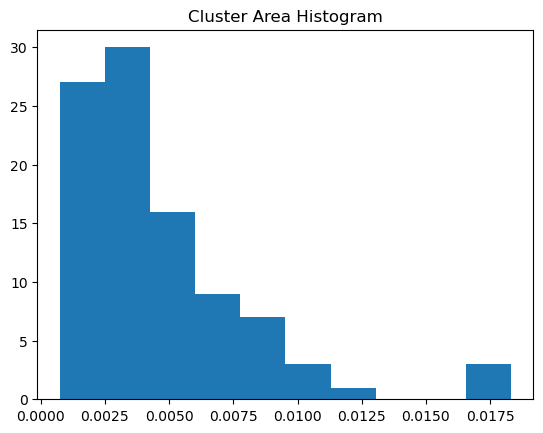

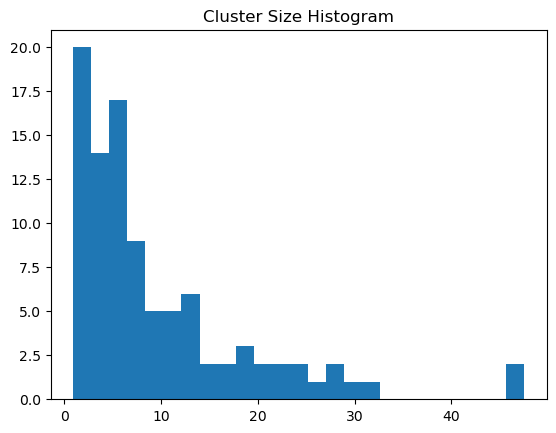

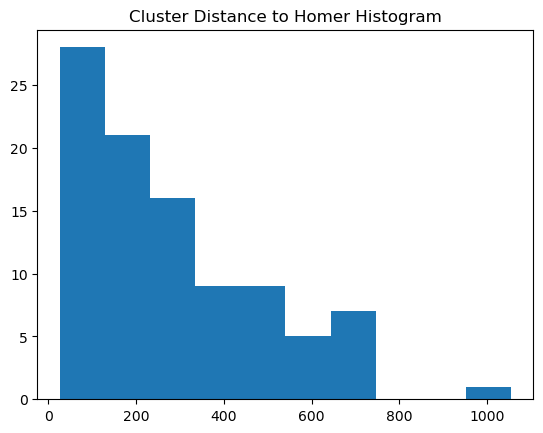

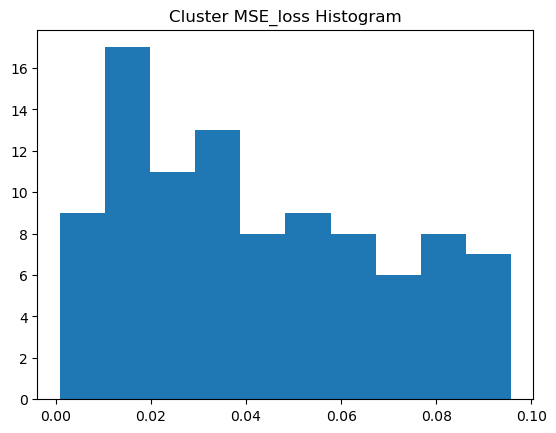

In [7]:
plt.figure()
plt.hist(cluster_data[0], bins=10)
plt.title("Cluster Area Histogram")
plt.show()

plt.figure()
plt.hist(cluster_data[1], bins=25)
plt.title("Cluster Size Histogram")
plt.show()

plt.figure()
plt.hist(cluster_data[2], bins=10)
plt.title("Cluster Distance to Homer Histogram")
plt.show()

plt.figure()
plt.hist(cluster_data[3], bins=10)
plt.title("Cluster MSE_loss Histogram")
plt.show()

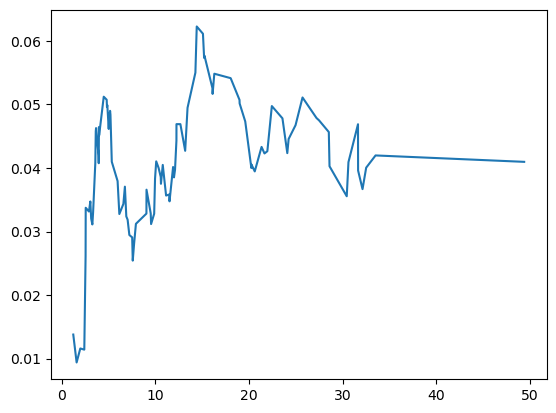

In [64]:
x, y = moving_average(cluster_data[2], cluster_data[3], 10)
plt.figure()
plt.plot(x, y)